In [1]:
import os


In [2]:
os.chdir("D://Projects//Credit_EDA_Assignment")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_application = pd.read_csv("application_data.csv")
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Checkin data structure

In [5]:
df_application.shape

(307511, 122)

In [6]:
print(df_application.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


In [7]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df_application.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
df_application.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.0,0.0,0.0,0.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.0,0.0,0.0,0.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.0,0.0,0.0,0.0,261.0


## Checking data qualty and missing values

In [11]:
df_missing = round(df_application.isnull().sum() / len(df_application)*100,2)

In [12]:
df_missing

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 122, dtype: float64

In [13]:
df_major_missing = df_missing[df_missing >= 40]

In [14]:
df_major_missing

OWN_CAR_AGE                     65.99
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MODE                   59.38
LIVINGAPARTM

In [15]:
#df_minor_missing = df_missing[df_missing < 40]
#df_minor_missing

df_minor_missing = df_missing[(df_missing < 40) & (df_missing  > 0)].sort_values(ascending=False)
df_minor_missing

OCCUPATION_TYPE               31.35
EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

In [16]:
len(df_major_missing)

49

In [17]:
len(df_minor_missing)

15

In [18]:
df_application = df_application.drop(columns = df_major_missing.index)

In [19]:
df_application.shape

(307511, 73)

In [20]:
df_application[df_minor_missing[2:8].index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_DAY   265992 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  265992 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_MON   265992 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_QRT   265992 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_YEAR  265992 non-null  float64
dtypes: float64(6)
memory usage: 14.1 MB


In [21]:
print("AMT_REQ_CREDIT_BUREAU_YEAR unique values :",df_application["AMT_REQ_CREDIT_BUREAU_YEAR"].unique())

AMT_REQ_CREDIT_BUREAU_YEAR unique values : [ 1.  0. nan  2.  4.  5.  3.  8.  6.  9.  7. 10. 11. 13. 16. 12. 25. 23.
 15. 14. 22. 17. 19. 18. 21. 20.]


In [22]:
print("AMT_REQ_CREDIT_BUREAU_HOUR unique values :", df_application["AMT_REQ_CREDIT_BUREAU_HOUR"].nunique())
print("AMT_REQ_CREDIT_BUREAU_YEAR unique values :", df_application["AMT_REQ_CREDIT_BUREAU_YEAR"].nunique())
print("AMT_REQ_CREDIT_BUREAU_DAY unique values :", df_application["AMT_REQ_CREDIT_BUREAU_DAY"].nunique())
print("AMT_REQ_CREDIT_BUREAU_WEEK unique values :", df_application["AMT_REQ_CREDIT_BUREAU_WEEK"].nunique())
print("AMT_REQ_CREDIT_BUREAU_MON unique values :", df_application["AMT_REQ_CREDIT_BUREAU_MON"].nunique())
print("AMT_REQ_CREDIT_BUREAU_QRT unique values :", df_application["AMT_REQ_CREDIT_BUREAU_QRT"].nunique())

AMT_REQ_CREDIT_BUREAU_HOUR unique values : 5
AMT_REQ_CREDIT_BUREAU_YEAR unique values : 25
AMT_REQ_CREDIT_BUREAU_DAY unique values : 9
AMT_REQ_CREDIT_BUREAU_WEEK unique values : 9
AMT_REQ_CREDIT_BUREAU_MON unique values : 24
AMT_REQ_CREDIT_BUREAU_QRT unique values : 11


In [23]:
df_application["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [24]:
df_application["AMT_REQ_CREDIT_BUREAU_YEAR"].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [25]:
df_application["AMT_REQ_CREDIT_BUREAU_DAY"].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [26]:
df_application["AMT_REQ_CREDIT_BUREAU_WEEK"].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [27]:
df_application["AMT_REQ_CREDIT_BUREAU_MON"].value_counts()

0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [28]:
df_application["AMT_REQ_CREDIT_BUREAU_QRT"].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [29]:
df_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [30]:
# There are lots of columns which no need to analysis, lets drop them.

unwanted_columns = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
          'FLAG_DOCUMENT_2','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
          'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
          'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
          'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
          'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [31]:
df_application.drop(columns = unwanted_columns, inplace = True)

In [32]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_application.shape

(307511, 42)

In [34]:
df_application.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [35]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [36]:
df_application.nunique().sort_values(ascending = True)

LIVE_CITY_NOT_WORK_CITY            2
REG_CITY_NOT_WORK_CITY             2
FLAG_MOBIL                         2
FLAG_OWN_REALTY                    2
REG_CITY_NOT_LIVE_CITY             2
NAME_CONTRACT_TYPE                 2
TARGET                             2
FLAG_OWN_CAR                       2
CODE_GENDER                        3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_60_CNT_SOCIAL_CIRCLE           9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_YEAR        25
O

In [37]:
df_application.nunique().sort_values().index

Index(['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_MOBIL',
       'FLAG_OWN_REALTY', 'REG_CITY_NOT_LIVE_CITY', 'NAME_CONTRACT_TYPE',
       'TARGET', 'FLAG_OWN_CAR', 'CODE_GENDER', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'ORGANIZATION_TYPE', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_3',
       'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'AMT_ANNUITY', 'DAYS_REGISTRATION', 'DAYS_BIRTH',
       'EXT_SOUR

In [38]:
categorical_columns = ['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_MOBIL',
       'FLAG_OWN_REALTY', 'REG_CITY_NOT_LIVE_CITY', 'NAME_CONTRACT_TYPE',
       'TARGET', 'FLAG_OWN_CAR', 'CODE_GENDER', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_TYPE_SUITE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_INCOME_TYPE',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
       'OCCUPATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_MON',
       'HOUR_APPR_PROCESS_START', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'ORGANIZATION_TYPE', 'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_3',
       'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'AMT_ANNUITY', 'DAYS_REGISTRATION', 'DAYS_BIRTH',
       'EXT_SOURCE_2', 'SK_ID_CURR']

In [39]:
for i in categorical_columns:
    df_application[i] = df_application[i].astype("object")

In [40]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   SK_ID_CURR                  307511 non-null  object
 1   TARGET                      307511 non-null  object
 2   NAME_CONTRACT_TYPE          307511 non-null  object
 3   CODE_GENDER                 307511 non-null  object
 4   FLAG_OWN_CAR                307511 non-null  object
 5   FLAG_OWN_REALTY             307511 non-null  object
 6   CNT_CHILDREN                307511 non-null  object
 7   AMT_INCOME_TOTAL            307511 non-null  object
 8   AMT_CREDIT                  307511 non-null  object
 9   AMT_ANNUITY                 307499 non-null  object
 10  AMT_GOODS_PRICE             307233 non-null  object
 11  NAME_TYPE_SUITE             306219 non-null  object
 12  NAME_INCOME_TYPE            307511 non-null  object
 13  NAME_EDUCATION_TYPE         3

In [41]:
df_application[["DAYS_BIRTH","DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511,307511,307511.0,307511
unique,17460,12574,15688.0,6168
top,-13749,365243,-1.0,-4053
freq,43,55374,113.0,169


In [42]:
# Lets change the negetive to positive value using abs and change the day to year

days_columns = ["DAYS_BIRTH","DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH"]
df_application[days_columns] = df_application[days_columns].abs()
df_application[days_columns] = df_application[days_columns]/365
df_application[days_columns].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.00000,307511.00000
unique,17460.000000,12574.000000,15688.00000,6168.00000
top,37.668493,1000.665753,0.00274,11.10411
freq,43.000000,55374.000000,113.00000,169.00000


In [43]:
# change the columns name

df_application.rename(columns = {"DAYS_BIRTH" : "Years_Birth","DAYS_EMPLOYED" : "Years_Employed", "DAYS_REGISTRATION" : "Years_Registration", "DAYS_ID_PUBLISH" : "Years_Id_Publish"}, inplace = True)

In [44]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   SK_ID_CURR                  307511 non-null  object
 1   TARGET                      307511 non-null  object
 2   NAME_CONTRACT_TYPE          307511 non-null  object
 3   CODE_GENDER                 307511 non-null  object
 4   FLAG_OWN_CAR                307511 non-null  object
 5   FLAG_OWN_REALTY             307511 non-null  object
 6   CNT_CHILDREN                307511 non-null  object
 7   AMT_INCOME_TOTAL            307511 non-null  object
 8   AMT_CREDIT                  307511 non-null  object
 9   AMT_ANNUITY                 307499 non-null  object
 10  AMT_GOODS_PRICE             307233 non-null  object
 11  NAME_TYPE_SUITE             306219 non-null  object
 12  NAME_INCOME_TYPE            307511 non-null  object
 13  NAME_EDUCATION_TYPE         3

In [45]:
df_application["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [46]:
df_application.loc[df_application["CODE_GENDER"] == "XNA", "CODE_GENDER"] = "F"

In [47]:
df_application["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [48]:
#Lets check the 'AMT_INCOME_TOTAL' and 'AMT_CREDIT' variables

df_application[['AMT_INCOME_TOTAL','AMT_CREDIT']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT
count,307511.0,307511.0
unique,2548.0,5603.0
top,135000.0,450000.0
freq,35750.0,9709.0


In [49]:
# its hard to determine the type of customer based on these are continous

bins=[0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,150000000]
ranges=['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000',
          '5000000 and above']
df_application['Amt_Income_Range'] = pd.cut(df_application['AMT_INCOME_TOTAL'],bins,labels=ranges)
df_application['Amt_Credit_Range'] = pd.cut(df_application['AMT_CREDIT'],bins,labels=ranges)

In [50]:
df_application[['Amt_Income_Range','Amt_Credit_Range']].describe()

,Amt_Income_Range,Amt_Credit_Range
count,307511,307511
unique,19,18
top,100000-250000,250000-500000
freq,204035,90135


In [51]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000


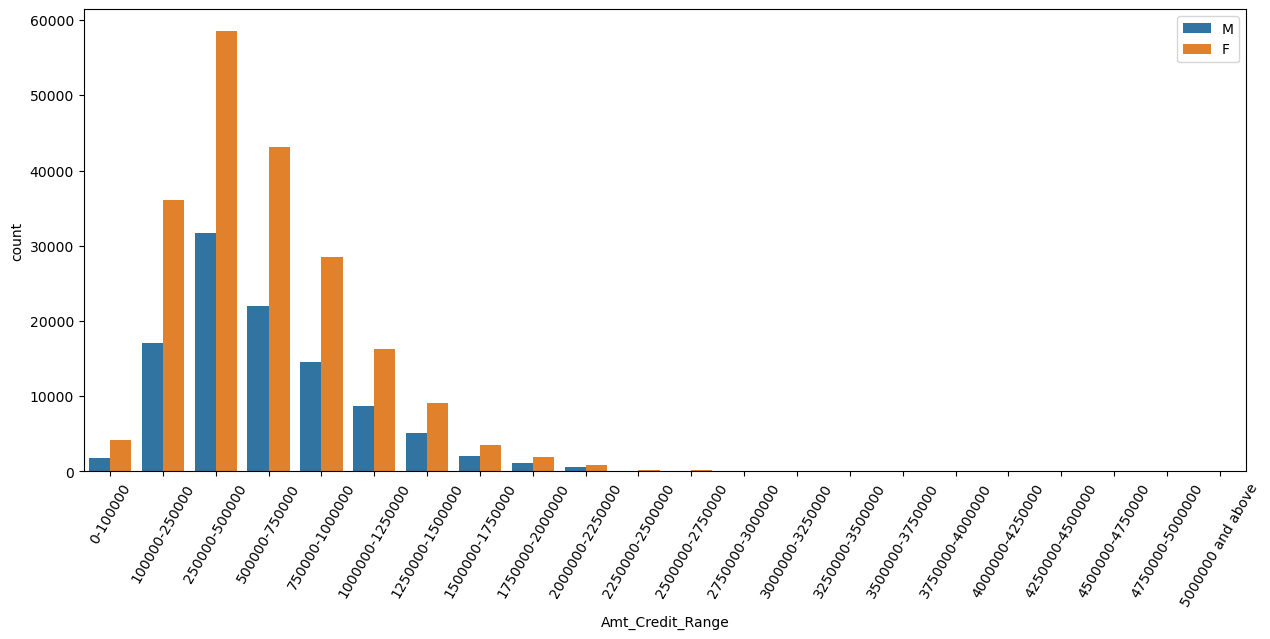

In [52]:
# plot on amount credit

plt.figure(figsize = [15,6])
sns.countplot(data = df_application, x = "Amt_Credit_Range", hue = "CODE_GENDER")
plt.xticks(rotation = 60)
plt.legend(loc = "upper right")
plt.show()

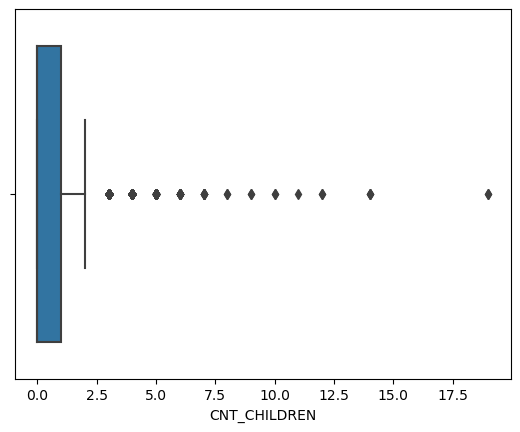

In [53]:
sns.boxplot(df_application["CNT_CHILDREN"])
plt.show()

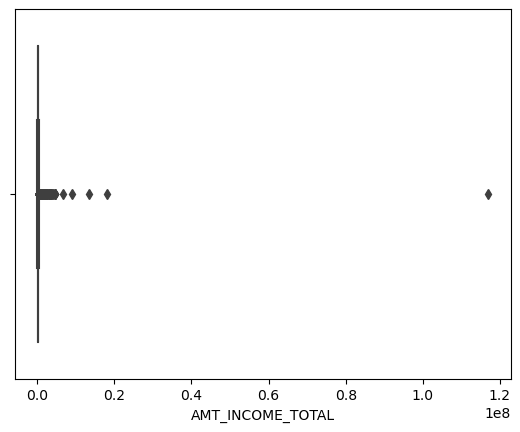

In [54]:
sns.boxplot(df_application["AMT_INCOME_TOTAL"])
plt.show()

In [55]:
#lets see the outlier, maximum income

df_application[df_application['AMT_INCOME_TOTAL']== df_application['AMT_INCOME_TOTAL'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5000000 and above,500000-750000


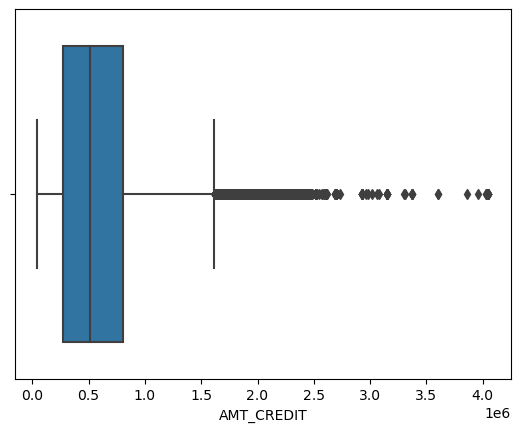

In [56]:
sns.boxplot(df_application["AMT_CREDIT"])
plt.show()

In [57]:
#lets see what rows have more AMT_CREDIT than AMT_INCOME_TOTAL

df_application[df_application["AMT_CREDIT"] > df_application["AMT_INCOME_TOTAL"]]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,1250000-1500000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,100000-250000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,500000-750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,100000-250000,250000-500000
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0-100000,250000-500000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,100000-250000,500000-750000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100000-250000,250000-500000


In [58]:
#in almost all cases,it has proved .,lets check which are more than 3.5*1e6 ,as we seen in boxplot

df_application[df_application['AMT_CREDIT'] > 3.5*1e6]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range
14643,117085,0,Cash loans,F,Y,N,2,749331.0,3956274.0,197230.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,500000-750000,3750000-4000000
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750000-1000000,4000000-4250000
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750000-1000000,4000000-4250000
53936,162494,0,Cash loans,M,Y,N,0,900450.0,3600000.0,91008.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,750000-1000000,3500000-3750000
95571,210956,0,Cash loans,M,N,Y,0,430650.0,4031032.5,102033.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,4000000-4250000
104577,221360,0,Cash loans,M,Y,N,0,468000.0,3600000.0,91138.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250000-500000,3500000-3750000
110459,228135,0,Cash loans,M,N,N,2,864900.0,4050000.0,102384.0,...,3.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,750000-1000000,4000000-4250000
119380,238431,0,Cash loans,F,Y,N,0,292050.0,3860019.0,97578.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,250000-500000,3750000-4000000
119681,238782,0,Cash loans,M,Y,Y,1,931365.0,4050000.0,102514.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750000-1000000,4000000-4250000
120757,240007,0,Cash loans,M,N,N,0,587250.0,4050000.0,106969.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500000-750000,4000000-4250000


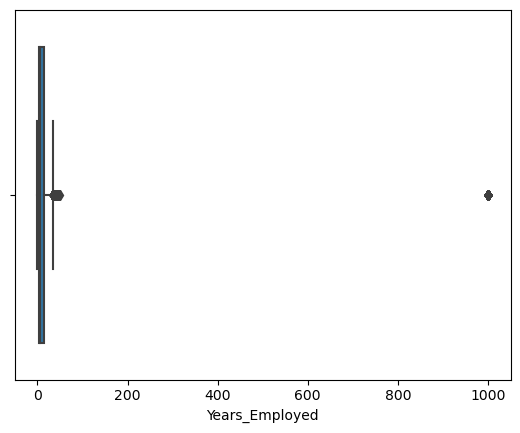

In [59]:
sns.boxplot(df_application["Years_Employed"])
plt.show()

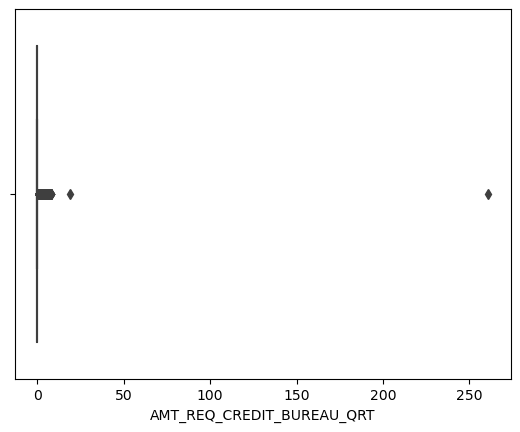

In [60]:
sns.boxplot(df_application['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

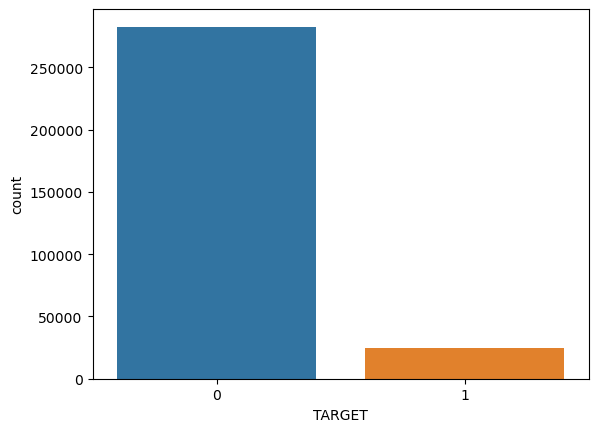

In [61]:
# lets check the distribution of data on variable values

sns.countplot(df_application["TARGET"])
plt.show()

In [62]:
df_application["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [63]:
df_application["TARGET"].value_counts(normalize = True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [64]:
# Create target variable data_frame where target variable = 0

df_target_0 = df_application[df_application["TARGET"] == 0]


In [65]:
# Create new data_frame where target variable = 1

df_target_1 = df_application[df_application["TARGET"] == 1]

In [66]:
df_target_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Amt_Income_Range,Amt_Credit_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,100000-250000,250000-500000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,100000-250000,750000-1000000
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,100000-250000,1000000-1250000
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100000-250000,250000-500000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0-100000,250000-500000


In [67]:
df_target_1.shape

(24825, 44)

In [68]:
ratio = df_target_0.shape[0] / df_target_1.shape[0]
ratio

11.387150050352467

In [69]:
# Heatmap for target variable 0

# plt.figure(figsize = (10,6))
# sns.heatmap(df_target_0.corr(),cmap="cool",annot=True)
# plt.title("Correlation matrix for target variable 1", color = "red")
# plt.show()

In [70]:
# Heatmap for target variable 0

# plt.figure(figsize = (10,6))
# sns.heatmap(df_target_1.corr(),cmap="cool",annot=True)
# plt.title("Correlation matrix for target variable 1", color = "red")
# plt.show()

## Univariate Analysis

In [71]:
df_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307511 non-null  object  
 1   TARGET                      307511 non-null  object  
 2   NAME_CONTRACT_TYPE          307511 non-null  object  
 3   CODE_GENDER                 307511 non-null  object  
 4   FLAG_OWN_CAR                307511 non-null  object  
 5   FLAG_OWN_REALTY             307511 non-null  object  
 6   CNT_CHILDREN                307511 non-null  object  
 7   AMT_INCOME_TOTAL            307511 non-null  object  
 8   AMT_CREDIT                  307511 non-null  object  
 9   AMT_ANNUITY                 307499 non-null  object  
 10  AMT_GOODS_PRICE             307233 non-null  object  
 11  NAME_TYPE_SUITE             306219 non-null  object  
 12  NAME_INCOME_TYPE            307511 non-null  object  
 13 

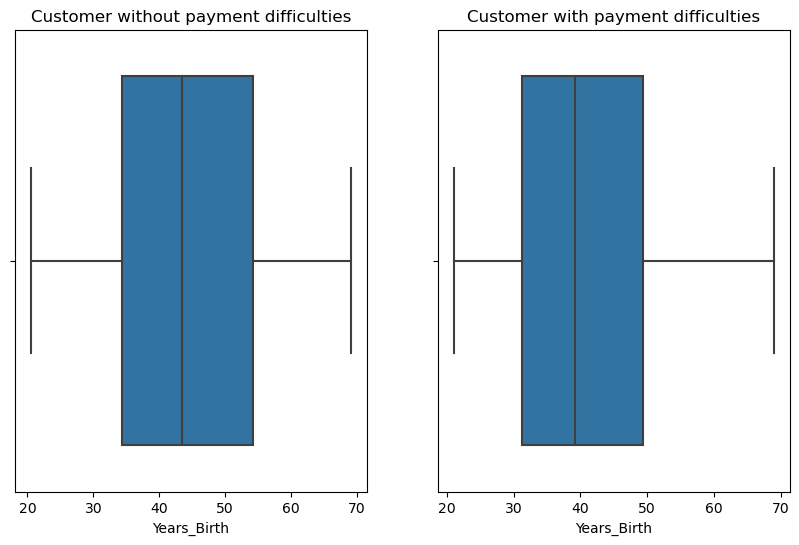

In [72]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.boxplot(df_target_0["Years_Birth"])
plt.title("Customer without payment difficulties")
plt.subplot(1,2,2)
sns.boxplot(df_target_1["Years_Birth"])
plt.title("Customer with payment difficulties")
plt.show()

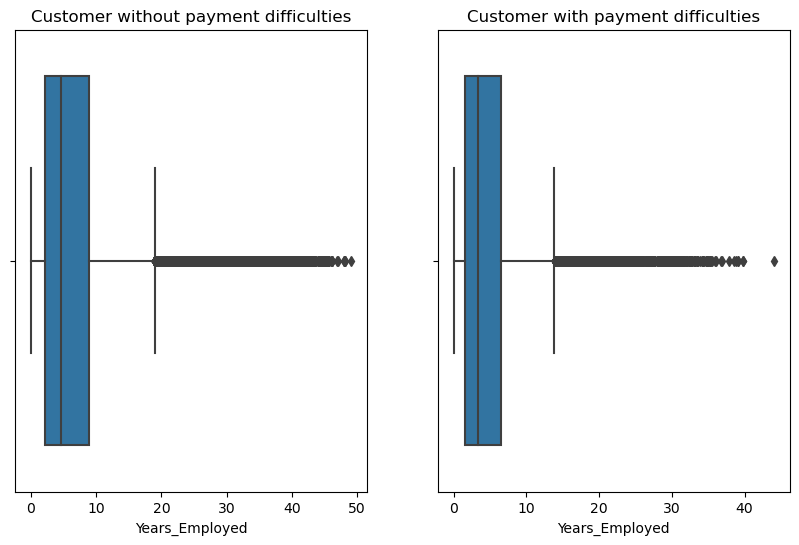

In [73]:
# Univariate Analysis of "Years_Employed"

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Customer without payment difficulties")
sns.boxplot(df_target_0[df_target_0["Years_Employed"] < 1000]["Years_Employed"])
plt.subplot(1,2,2)
plt.title("Customer with payment difficulties")
sns.boxplot(df_target_1[df_target_1["Years_Employed"] < 1000]["Years_Employed"])
plt.show()

In [74]:
df_application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'Years_Birth',
       'Years_Employed', 'Years_Registration', 'Years_Id_Publish',
       'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_

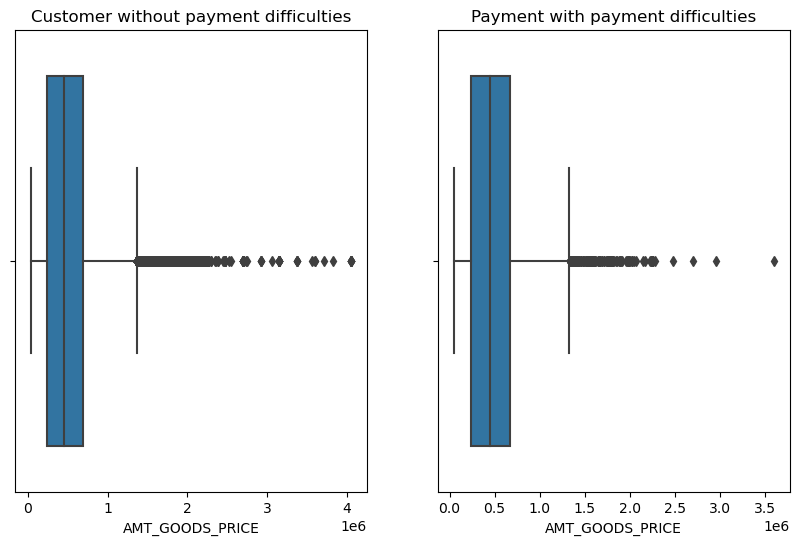

In [75]:
# Univeriate Analysis of "AMT_GOODS_PRICE"

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.boxplot(df_target_0["AMT_GOODS_PRICE"])
plt.title("Customer without payment difficulties")
plt.subplot(1,2,2)
sns.boxplot(df_target_1["AMT_GOODS_PRICE"])
plt.title("Payment with payment difficulties")
plt.show()

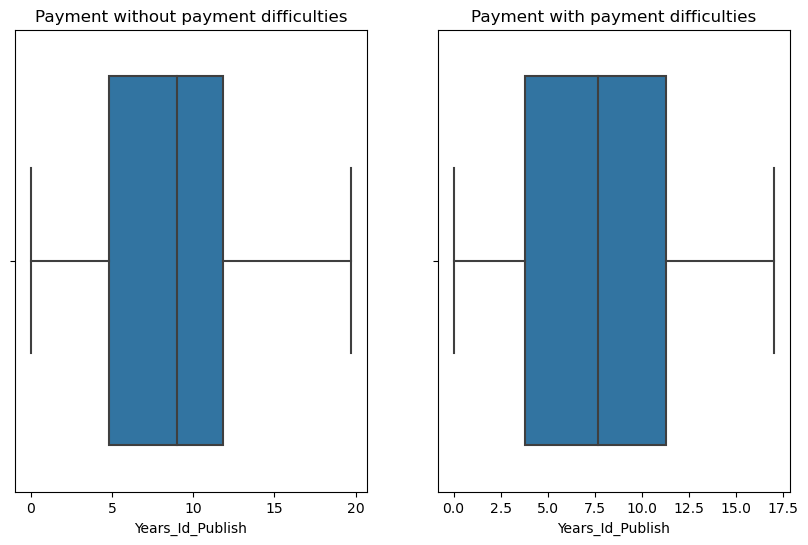

In [76]:
# Univariate Analysis of "YEARS_ID_PUBLISH"

plt.figure(figsize= (10,6))
plt.subplot(1,2,1)
sns.boxplot(df_target_0["Years_Id_Publish"])
plt.title("Payment without payment difficulties")
plt.subplot(1,2,2)
sns.boxplot(df_target_1["Years_Id_Publish"])
plt.title("Payment with payment difficulties")
plt.show()

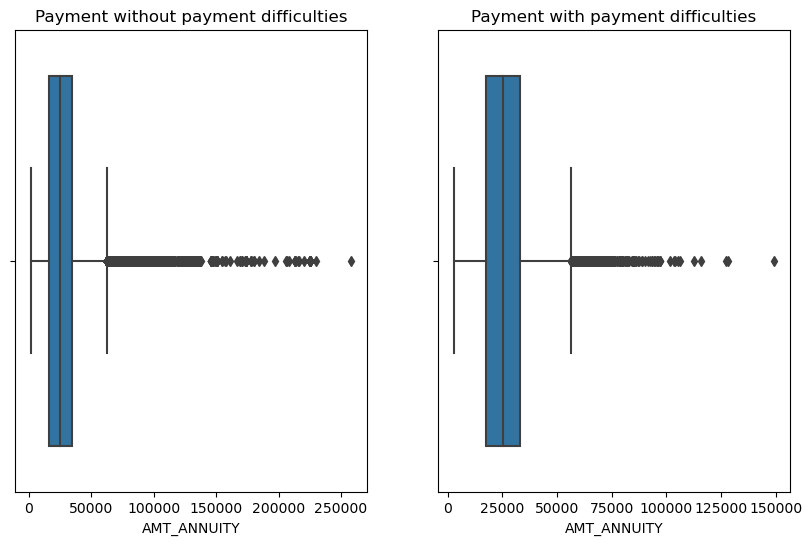

In [77]:
# Univeriate Analysis on AMT_ANNUITY

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.title("Payment without payment difficulties")
sns.boxplot(df_target_0["AMT_ANNUITY"])
plt.subplot(1,2,2)
plt.title("Payment with payment difficulties")
sns.boxplot(df_target_1["AMT_ANNUITY"])
plt.show()

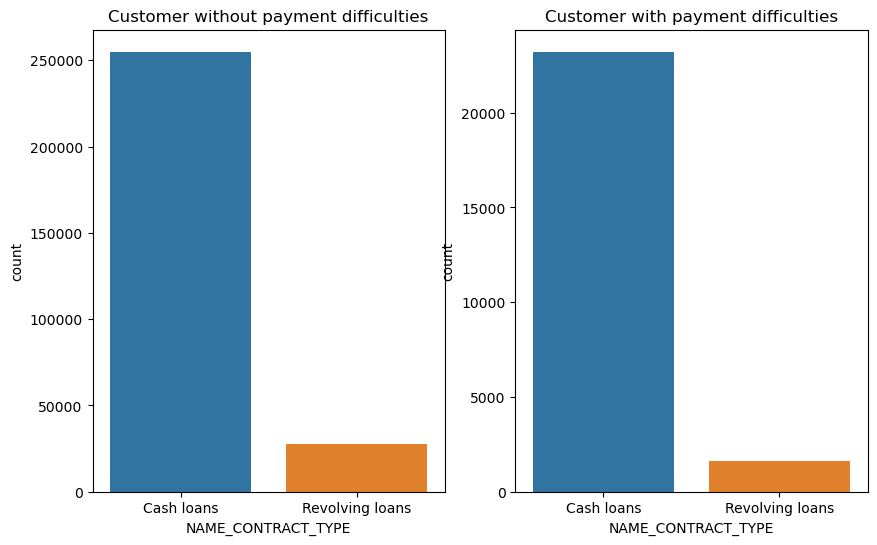

In [78]:
# Univariate Analysis on NAME_CONTACT_TYPE
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.countplot(df_target_0["NAME_CONTRACT_TYPE"])
plt.title("Customer without payment difficulties")

plt.subplot(1,2,2)
sns.countplot(df_target_1["NAME_CONTRACT_TYPE"])
plt.title("Customer with payment difficulties")
plt.show()

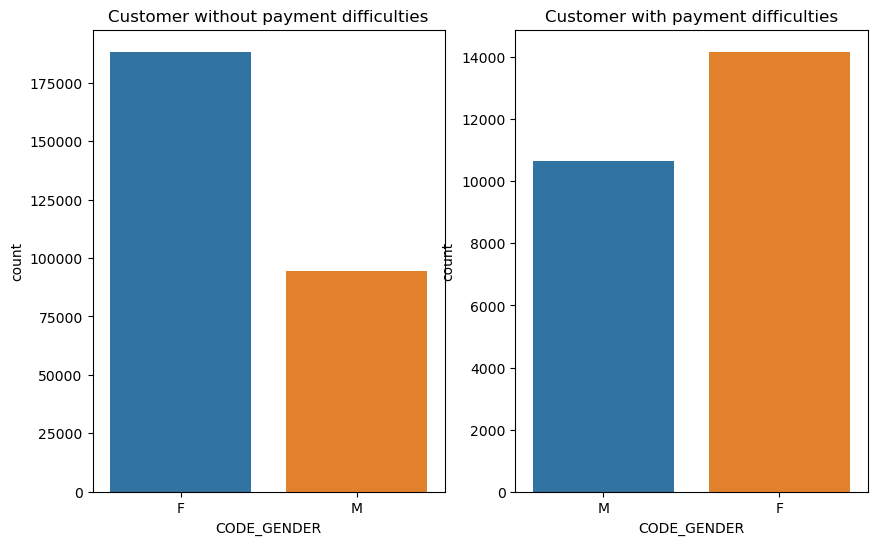

In [79]:
# CODE_GENDER Univariate Analysis

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.title("Customer without payment difficulties")
sns.countplot(df_target_0["CODE_GENDER"])
plt.subplot(1,2,2)
plt.title("Customer with payment difficulties")
sns.countplot(df_target_1["CODE_GENDER"])
plt.show()

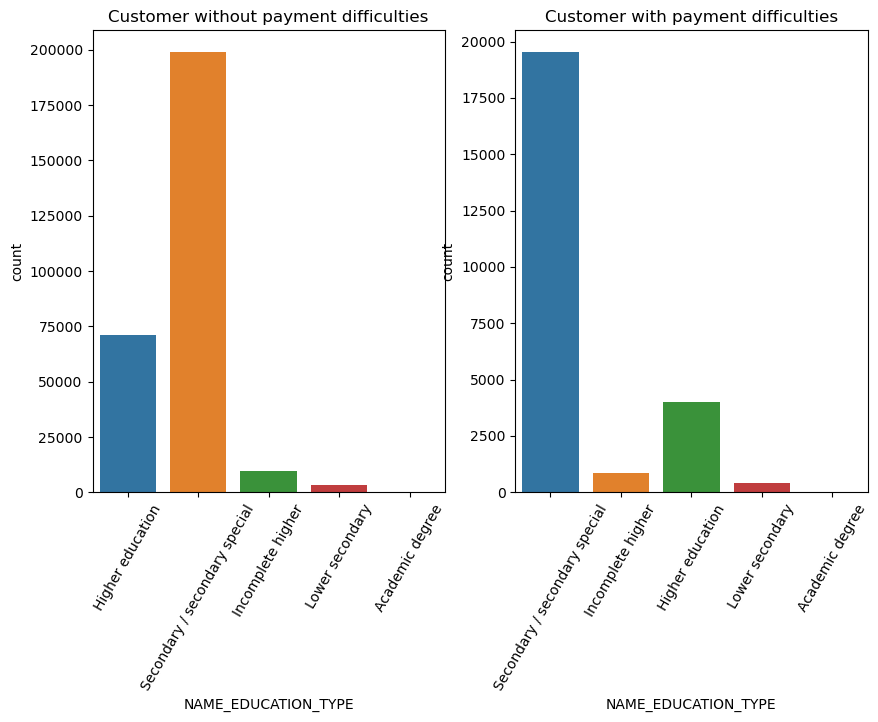

In [80]:
# Univariate Analysis of NAME_EDUCATION_TYPE

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.countplot(df_target_0["NAME_EDUCATION_TYPE"])
plt.title("Customer without payment difficulties")
plt.xticks(rotation = 60)

plt.subplot(1,2,2)
sns.countplot(df_target_1["NAME_EDUCATION_TYPE"])
plt.title("Customer with payment difficulties")
plt.xticks(rotation = 60)
plt.show()

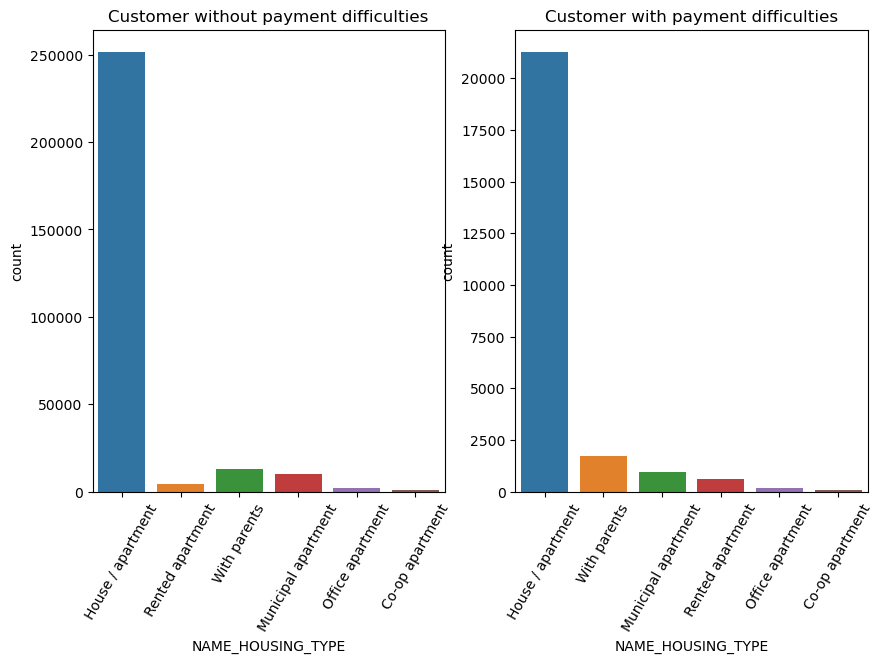

In [81]:
# Univariate Analysis of NAME_HOUSING_TYPE

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.countplot(df_target_0["NAME_HOUSING_TYPE"])
plt.title("Customer without payment difficulties")
plt.xticks(rotation = 60)

plt.subplot(1,2,2)
sns.countplot(df_target_1["NAME_HOUSING_TYPE"])
plt.title("Customer with payment difficulties")
plt.xticks(rotation = 60)
plt.show()

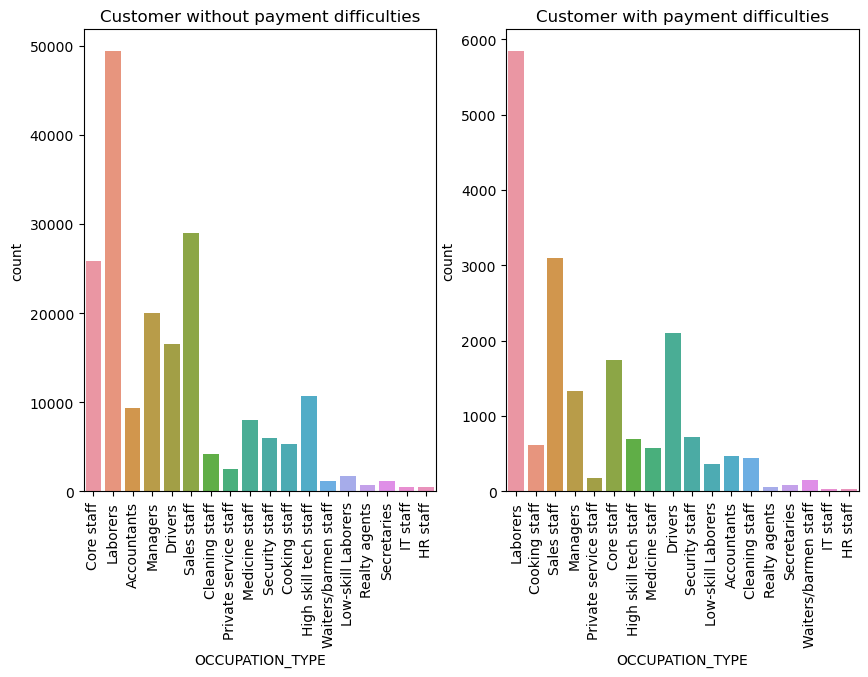

In [82]:
# Univariate Analysis of OCCUPATION_TYPE

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
sns.countplot(df_target_0["OCCUPATION_TYPE"])
plt.title("Customer without payment difficulties")
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(df_target_1["OCCUPATION_TYPE"])
plt.title("Customer with payment difficulties")
plt.xticks(rotation = 90)

plt.show()

## Bivariate Analysis

- Numerical Bivariate Analysis

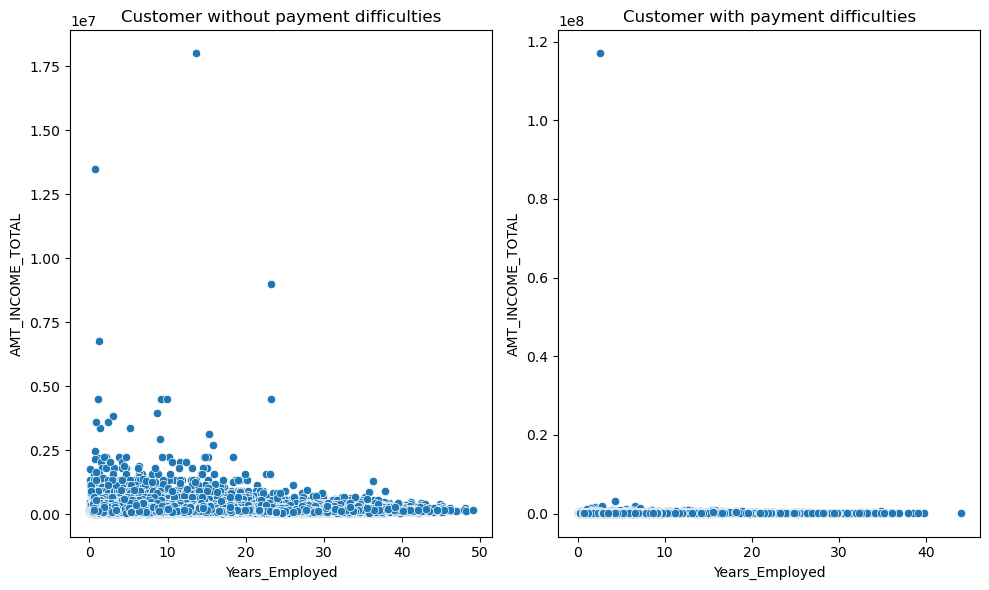

In [83]:
# Analysis on "Years_Employed" and AMT_INCOME_TOTAL

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.title("Customer without payment difficulties")
sns.scatterplot(data = df_target_0[df_target_0["Years_Employed"] < 1000], x="Years_Employed", y="AMT_INCOME_TOTAL")
plt.subplot(1,2,2)
plt.title("Customer with payment difficulties")
sns.scatterplot(data = df_target_1[df_target_1["Years_Employed"] < 1000], x="Years_Employed", y="AMT_INCOME_TOTAL")
plt.tight_layout()
plt.show()

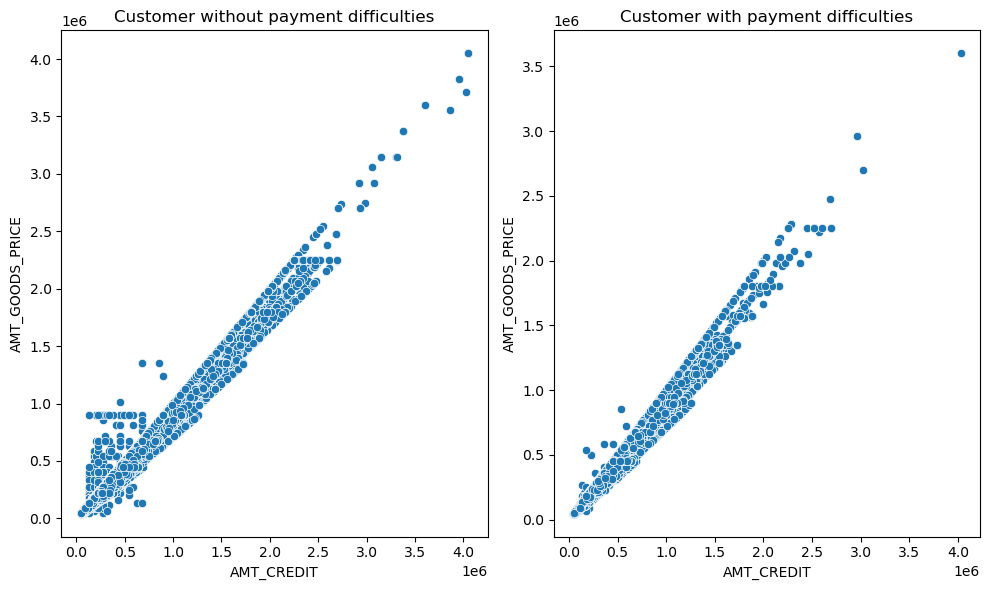

In [84]:
# Bivariate Analysis on AMT_CREDIT and AMT_GOODS_PRICE

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.title("Customer without payment difficulties")
sns.scatterplot(data = df_target_0, x = "AMT_CREDIT", y = "AMT_GOODS_PRICE")
plt.subplot(1,2,2)
plt.title("Customer with payment difficulties")
sns.scatterplot(data = df_target_1, x = "AMT_CREDIT", y = "AMT_GOODS_PRICE")
plt.tight_layout()
plt.show()

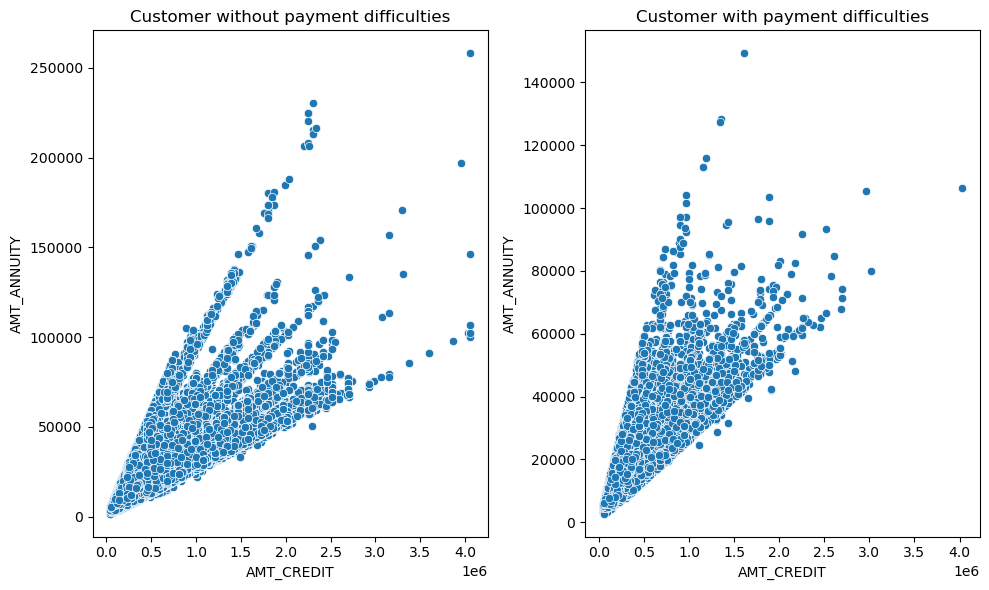

In [85]:
# Bivariate Analysis on 'AMT_CREDIT' and 'AMT_ANNUITY'

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df_target_0,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.scatterplot(data=df_target_1,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.show()

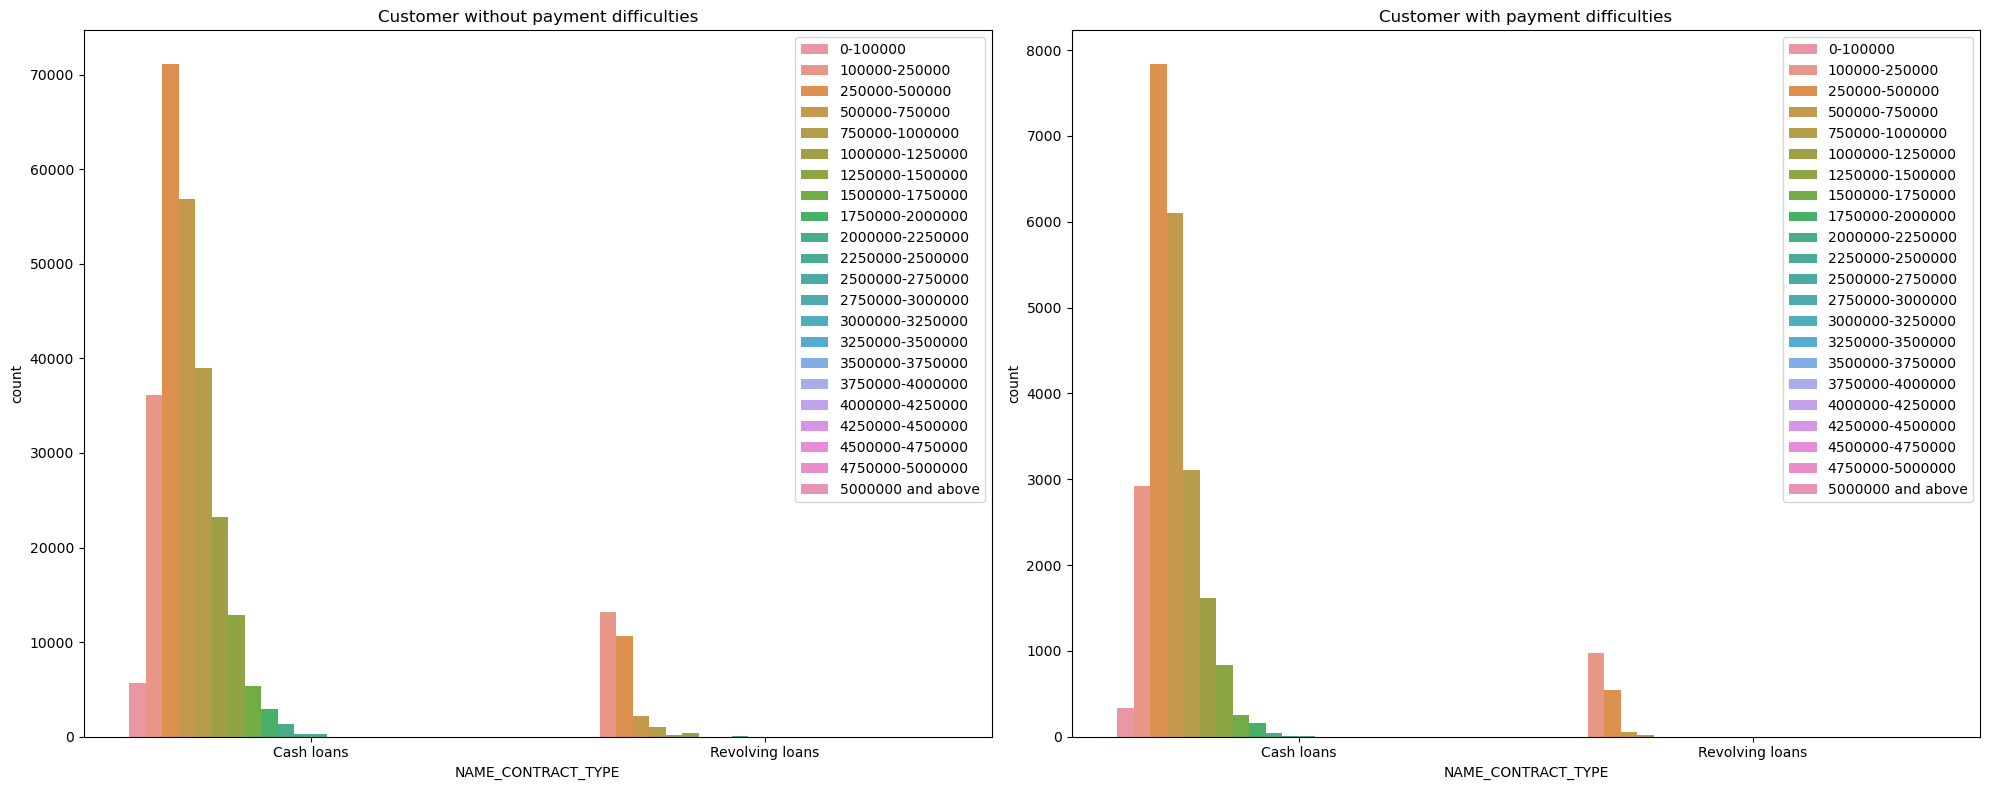

In [86]:
# Bivariate Analysis on NAME_CONTRACT_TYPE and Amt_Credit_Range

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(data=df_target_0,x='NAME_CONTRACT_TYPE',hue='Amt_Credit_Range')
plt.legend(loc='upper right')
plt.title('Customer without payment difficulties')
plt.subplot(1,2,2)
sns.countplot(data=df_target_1,x='NAME_CONTRACT_TYPE',hue='Amt_Credit_Range')
plt.title('Customer with payment difficulties')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

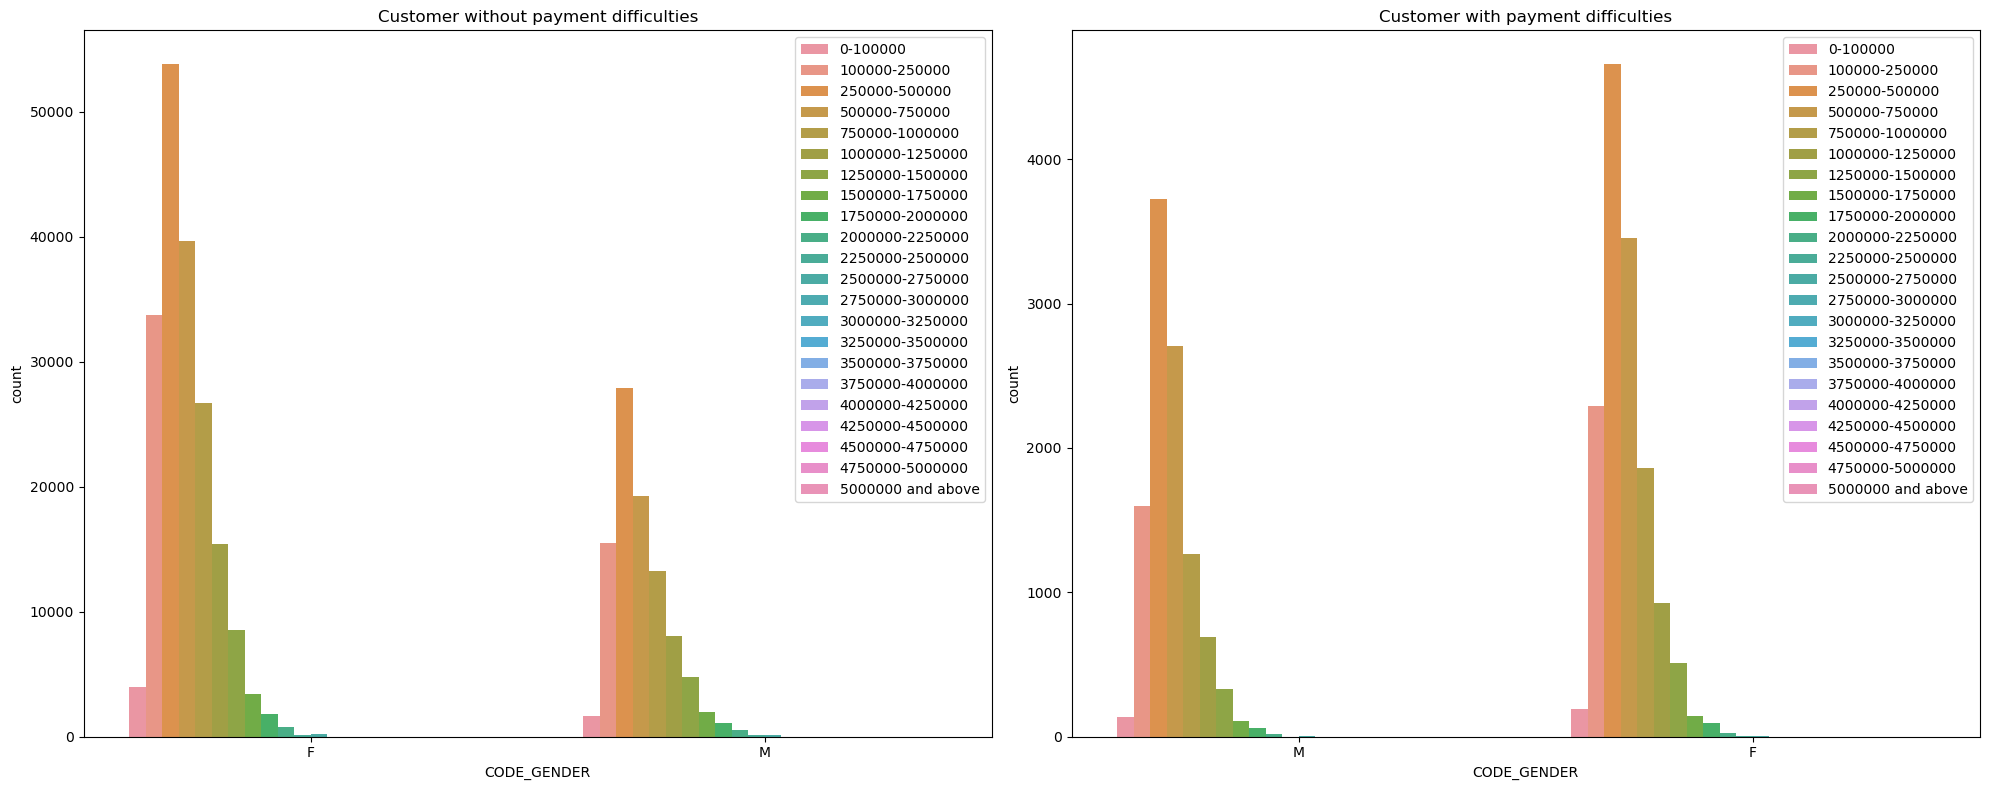

In [87]:
# Bivariate Analysis on CODE_GENDER and Amt_Credit_Range

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(data = df_target_0, x = "CODE_GENDER", hue = "Amt_Credit_Range")
plt.title("Customer without payment difficulties")
plt.legend(loc = "upper right")
plt.subplot(1,2,2)
sns.countplot(data = df_target_1, x = "CODE_GENDER", hue = "Amt_Credit_Range")
plt.title("Customer with payment difficulties")
plt.tight_layout()
plt.legend(loc = "upper right")
plt.show()

- here we can see that, Females are more in number taking loans and females have more amount credit range in both cases

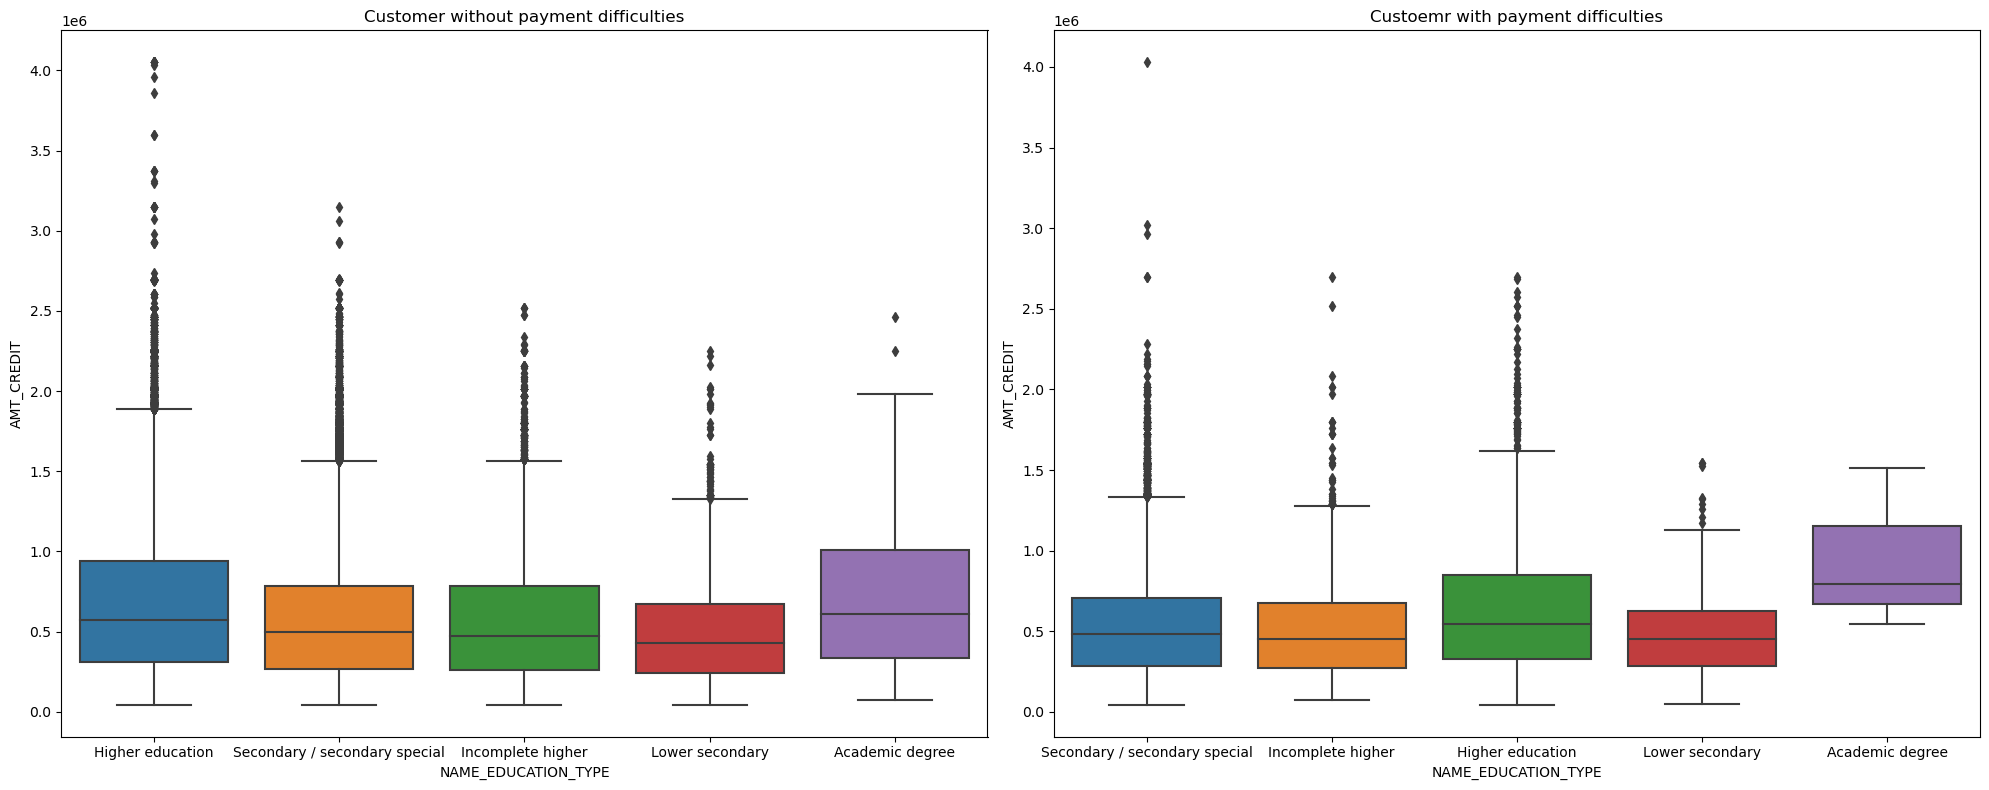

In [88]:
# Bivariate Analysis on AMT_CREDIT and NAME_EDUCATION_TYPE

plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.boxplot(data = df_target_0, y = "AMT_CREDIT", x = "NAME_EDUCATION_TYPE")
plt.title("Customer without payment difficulties")
plt.subplot(1,2,2)
sns.boxplot(data = df_target_1, y = "AMT_CREDIT", x = "NAME_EDUCATION_TYPE")
plt.title("Custoemr with payment difficulties")
plt.tight_layout()
plt.show()

- Here we can see that the range of customers with payment difficulties of academic degree is higher than wihtout payment difficulties
- rest of education type is similar to each other

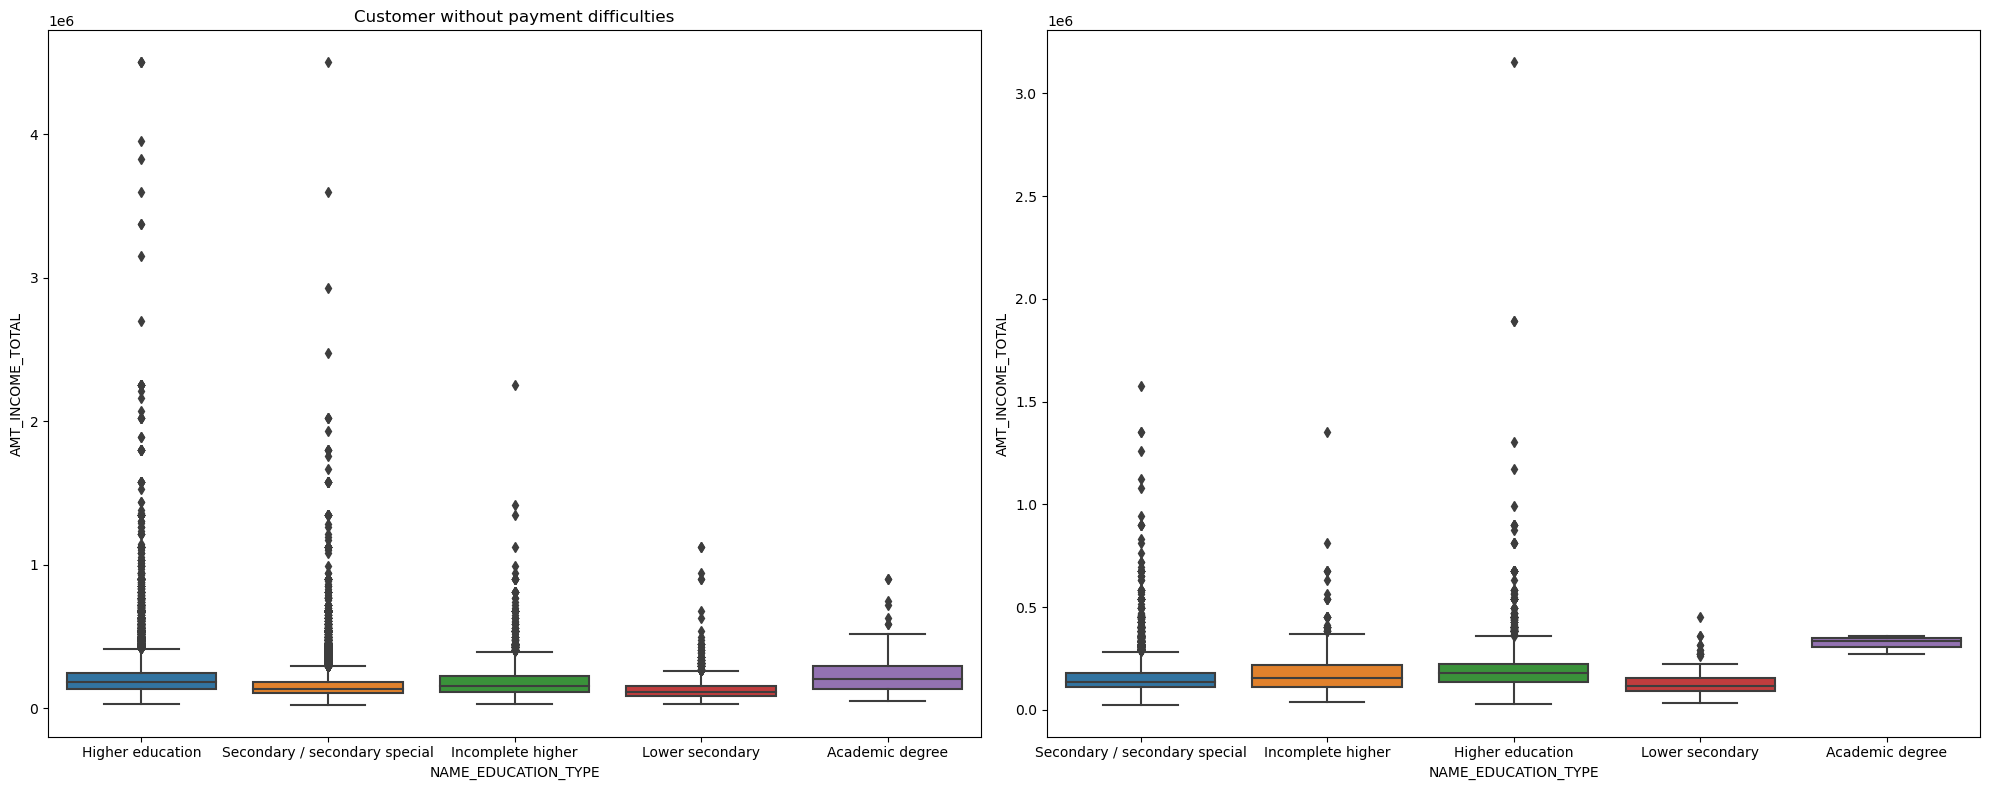

In [89]:
# Bivariate Analysis on AMT_INCOME_TOTAL and NAME_EDUCATION_TYPE

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data = df_target_0[df_target_0["AMT_INCOME_TOTAL"] < 5000000], y = "AMT_INCOME_TOTAL", x = "NAME_EDUCATION_TYPE")
plt.title("Customer without payment difficulties")
plt.subplot(1,2,2)
sns.boxplot(data = df_target_1[df_target_1["AMT_INCOME_TOTAL"] < 5000000], y = "AMT_INCOME_TOTAL", x = "NAME_EDUCATION_TYPE")
plt.tight_layout()
plt.show()

- Here, we can see that customer without payment difficulties are having more outliers than compared to customer with payment difficulties


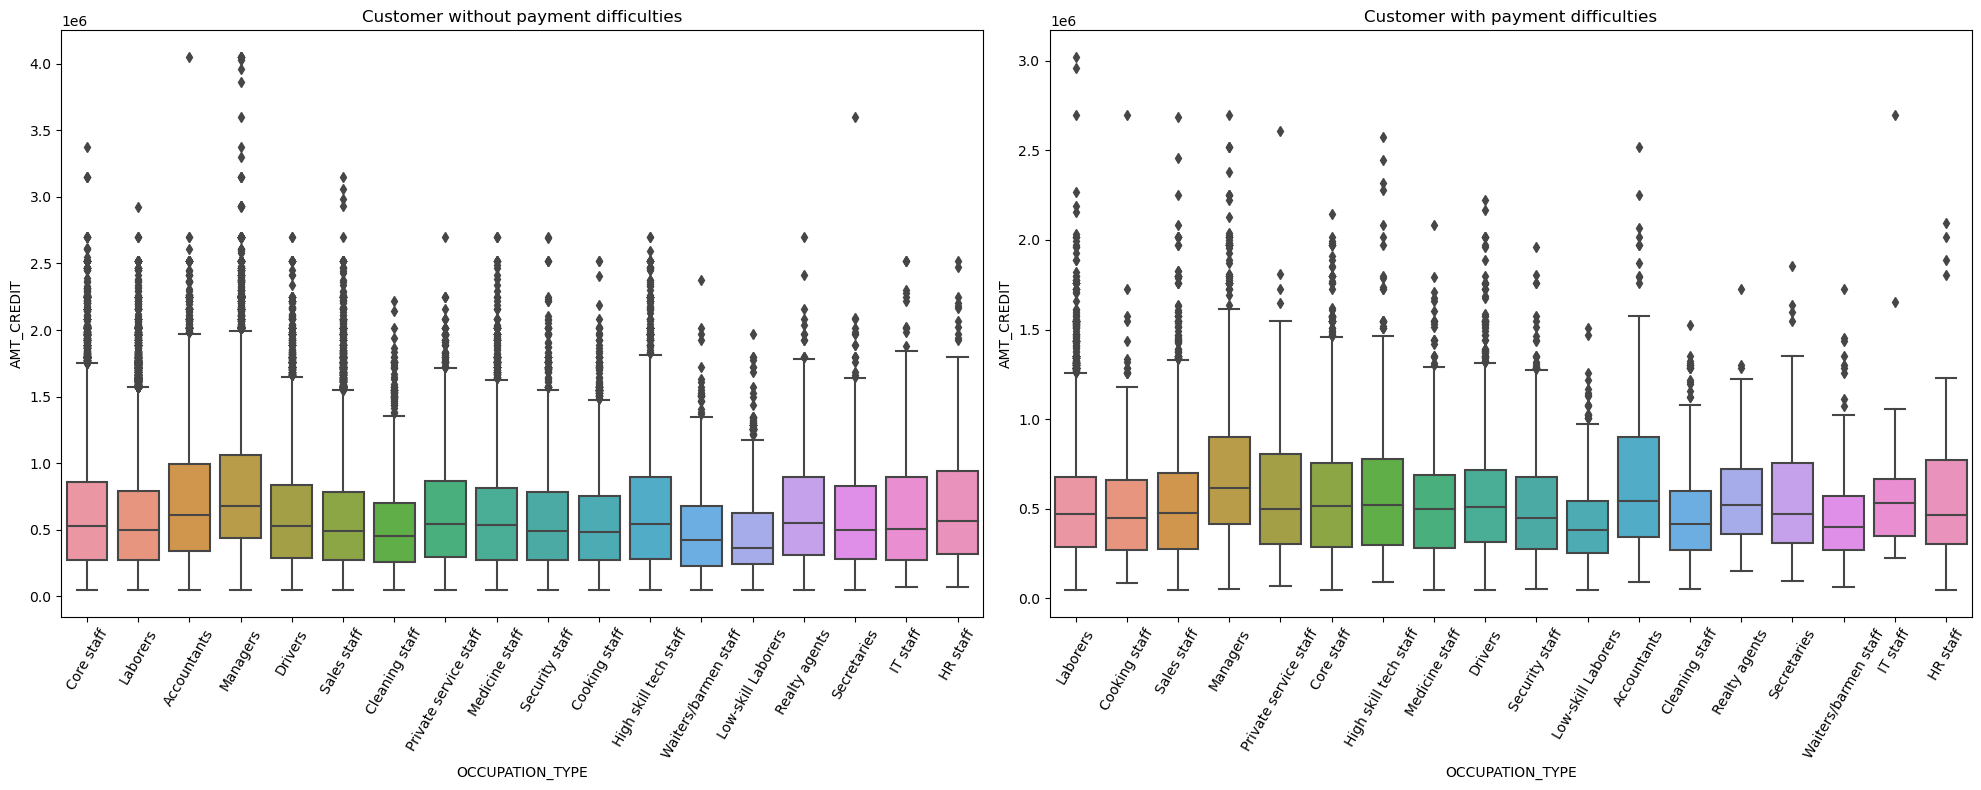

In [90]:
# #bivariate analysis on AMT_CREDIT and OCCUPATION_TYPE

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(data = df_target_0, y = "AMT_CREDIT", x = "OCCUPATION_TYPE")
plt.title("Customer without payment difficulties")
plt.xticks(rotation = 60)
plt.subplot(1,2,2)
sns.boxplot(data = df_target_1, y = "AMT_CREDIT", x = "OCCUPATION_TYPE")
plt.title("Customer with payment difficulties")
plt.tight_layout()
plt.xticks(rotation = 60)
plt.show()

- Here we can see that the range of the customers without payment more as compare to the customers with payment.

#### Lets merge the datasets : application_data_df and previous_application_df

In [91]:
df_previous_application = pd.read_csv("previous_application.csv")

In [92]:
df_previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df_previous_application.shape

(1670214, 37)

In [94]:
df_application.shape

(307511, 44)

In [95]:
df_previous_application.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616546,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


In [96]:
df_application.describe().T

,count,unique,top,freq
SK_ID_CURR,307511,307511,100002,1
TARGET,307511,2,0,282686
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,2,F,202452
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
CNT_CHILDREN,307511,15,0,215371
AMT_INCOME_TOTAL,307511.0,2548.0,135000.0,35750.0
AMT_CREDIT,307511.0,5603.0,450000.0,9709.0
AMT_ANNUITY,307499.0,13672.0,9000.0,6385.0


In [97]:
df_marge_data = pd.merge(left = df_application, right = df_previous_application, how = "inner", on = "SK_ID_CURR")

In [98]:
df_marge_data.shape

(1413701, 80)

In [99]:
df_marge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [100]:
# lets check the percentage of 'NAME_CONTRACT_STATUS'

df_marge_data["NAME_CONTRACT_STATUS"].value_counts(normalize=True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

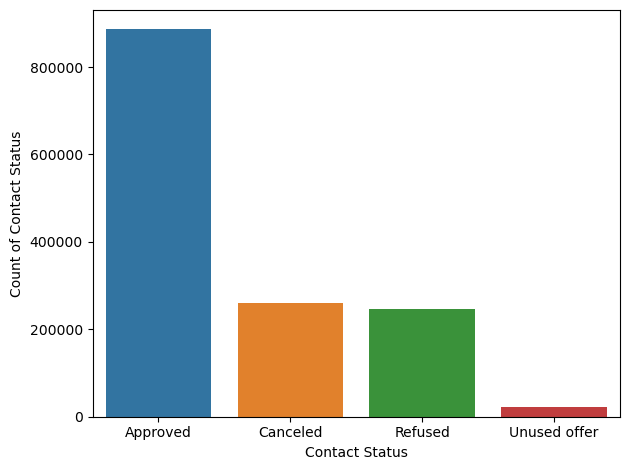

In [101]:
sns.countplot(df_marge_data["NAME_CONTRACT_STATUS"])
plt.xlabel("Contact Status")
plt.ylabel("Count of Contact Status")
plt.tight_layout()
plt.show()

In [102]:
# Dividing the dataset into four parts based on contact status

approved = df_marge_data[df_marge_data["NAME_CONTRACT_STATUS"] == "Approved"]
canceled = df_marge_data[df_marge_data["NAME_CONTRACT_STATUS"] == "Canceled"]
refused = df_marge_data[df_marge_data["NAME_CONTRACT_STATUS"] == "Refused"]
unused_ = df_marge_data[df_marge_data["NAME_CONTRACT_STATUS"] == "Unused offer"]

In [103]:
df_marge_data["NAME_CONTRACT_STATUS"].value_counts(normalize=True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

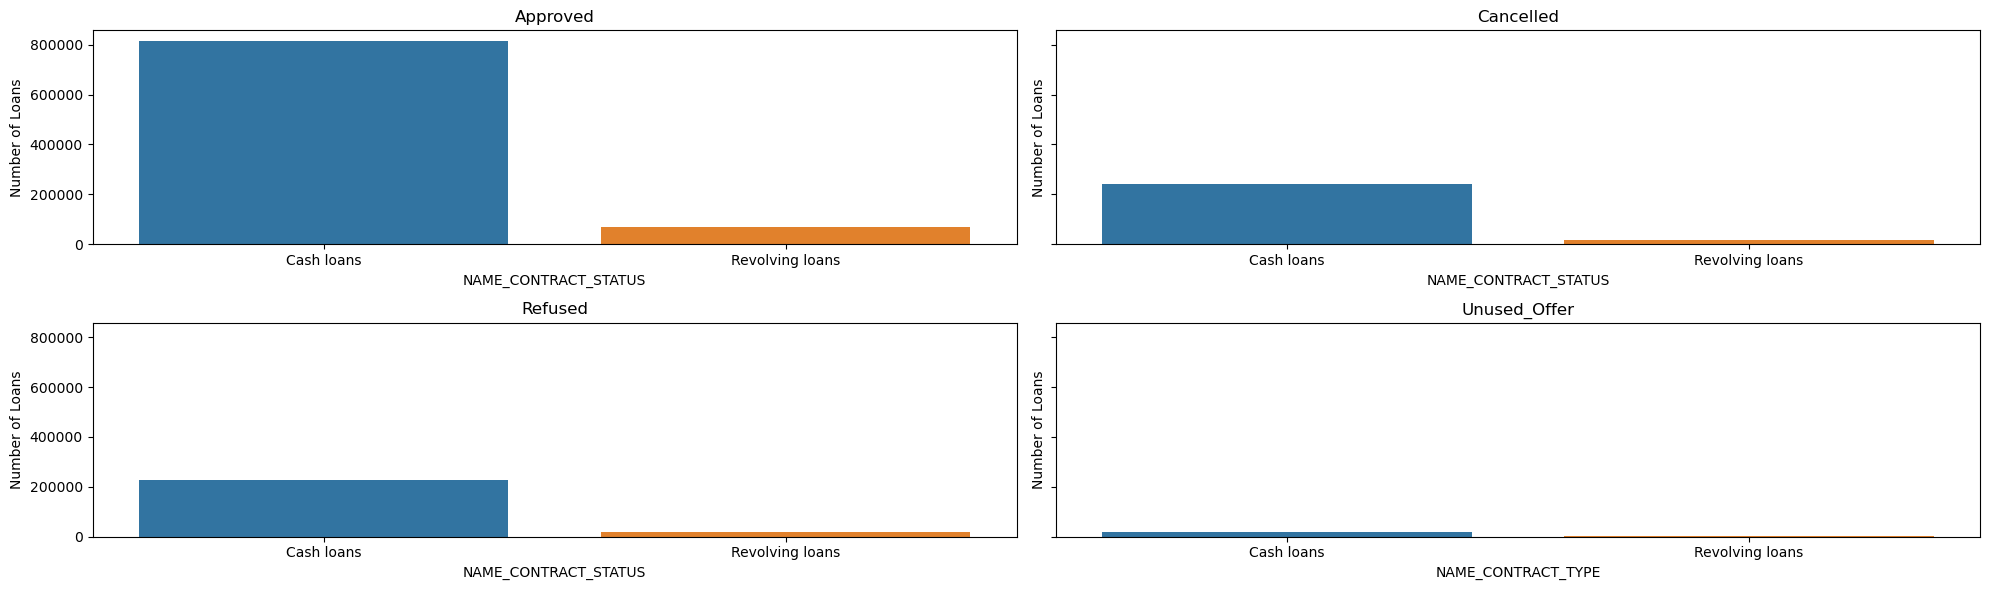

In [104]:
# Analysis on variable 'NAME_CONTRACT_TYPE_x'
fig,((sb1,sb2),(sb3,sb4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,6), sharey = True)

sb1 = sns.countplot(ax = sb1, data = approved, x = "NAME_CONTRACT_TYPE_x")
sb1.set_title("Approved")
sb1.set_xlabel("NAME_CONTRACT_STATUS")
sb1.set_ylabel("Number of Loans")

sb2 = sns.countplot(ax = sb2, data = canceled, x = "NAME_CONTRACT_TYPE_x")
sb2.set_title("Cancelled")
sb2.set_xlabel("NAME_CONTRACT_STATUS")
sb2.set_ylabel("Number of Loans")

sb3 = sns.countplot(ax = sb3, data = refused, x = "NAME_CONTRACT_TYPE_x")
sb3.set_title("Refused")
sb3.set_xlabel("NAME_CONTRACT_STATUS")
sb3.set_ylabel("Number of Loans")

sb4 = sns.countplot(ax = sb4, data = unused_, x = "NAME_CONTRACT_TYPE_x")
sb4.set_title("Unused_Offer")
sb4.set_xlabel("NAME_CONTRACT_TYPE")
sb4.set_ylabel("Number of Loans")

plt.tight_layout()
plt.show()

In [105]:
df_marge_data["NAME_CLIENT_TYPE"].value_counts()

Repeater     1037682
New           259540
Refreshed     114936
XNA             1543
Name: NAME_CLIENT_TYPE, dtype: int64

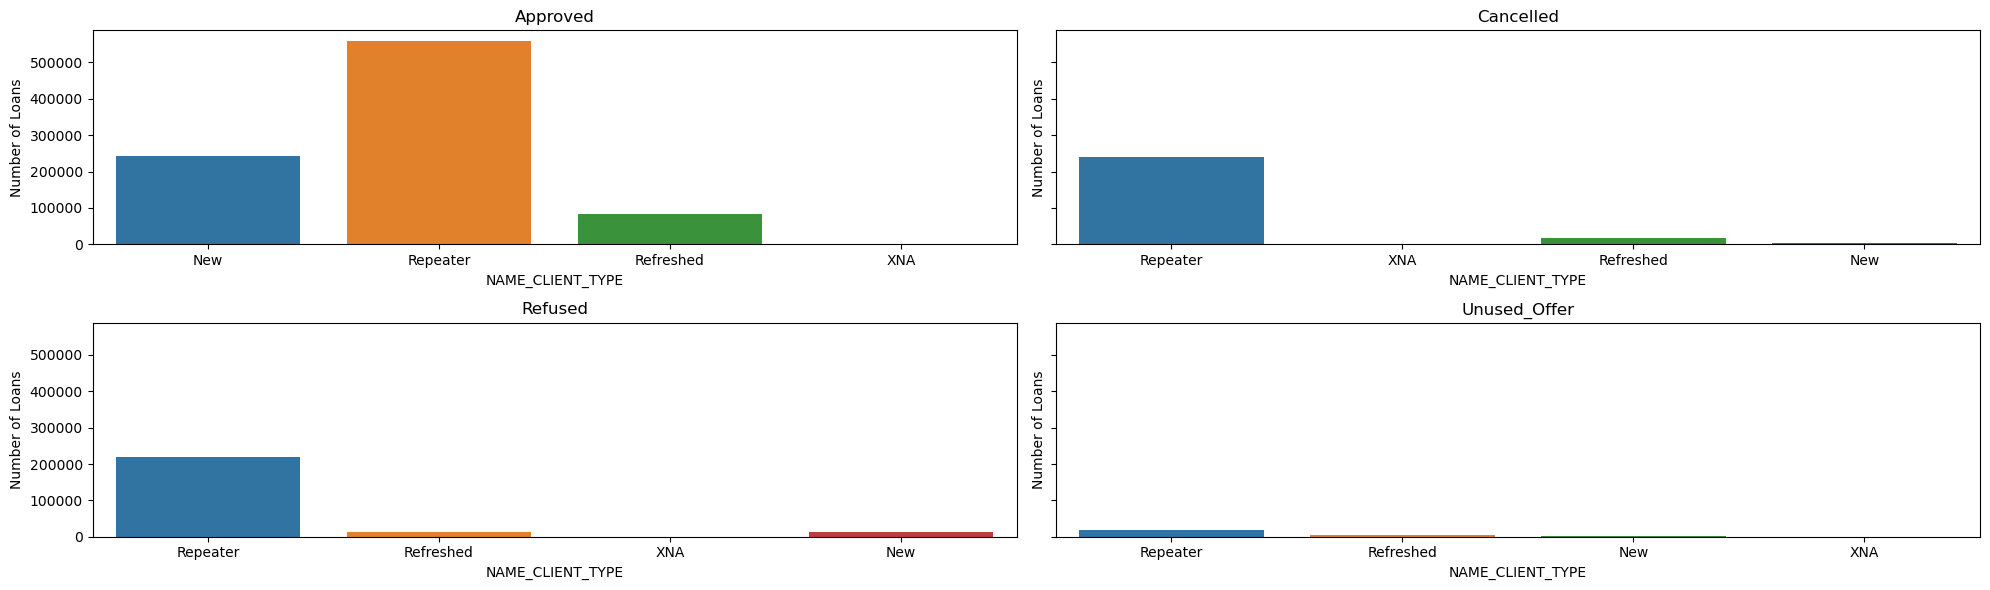

In [106]:
#Analysis on variable 'NAME_CLIENT_TYPE'

fig, ((sb1,sb2),(sb3,sb4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,6), sharey= True)

sb1 = sns.countplot(ax = sb1, data = approved, x="NAME_CLIENT_TYPE")
sb1.set_title("Approved")
sb1.set_xlabel("NAME_CLIENT_TYPE")
sb1.set_ylabel("Number of Loans")

sb2 = sns.countplot(ax=sb2, data=canceled, x="NAME_CLIENT_TYPE")
sb2.set_title("Cancelled")
sb2.set_xlabel("NAME_CLIENT_TYPE")
sb2.set_ylabel("Number of Loans")

sb3 = sns.countplot(ax=sb3, data=refused, x="NAME_CLIENT_TYPE")
sb3.set_title("Refused")
sb3.set_xlabel("NAME_CLIENT_TYPE")
sb3.set_ylabel("Number of Loans")

sb4 = sns.countplot(ax=sb4, data=unused_, x="NAME_CLIENT_TYPE")
sb4.set_title("Unused_Offer")
sb4.set_xlabel("NAME_CLIENT_TYPE")
sb4.set_ylabel("Number of Loans")

plt.tight_layout()
plt.show()

- Here we can see that the Repeater is getting more Refused.,
- but also we can see that the it also getting more apporved and even that it is getting more canceled and more usused.

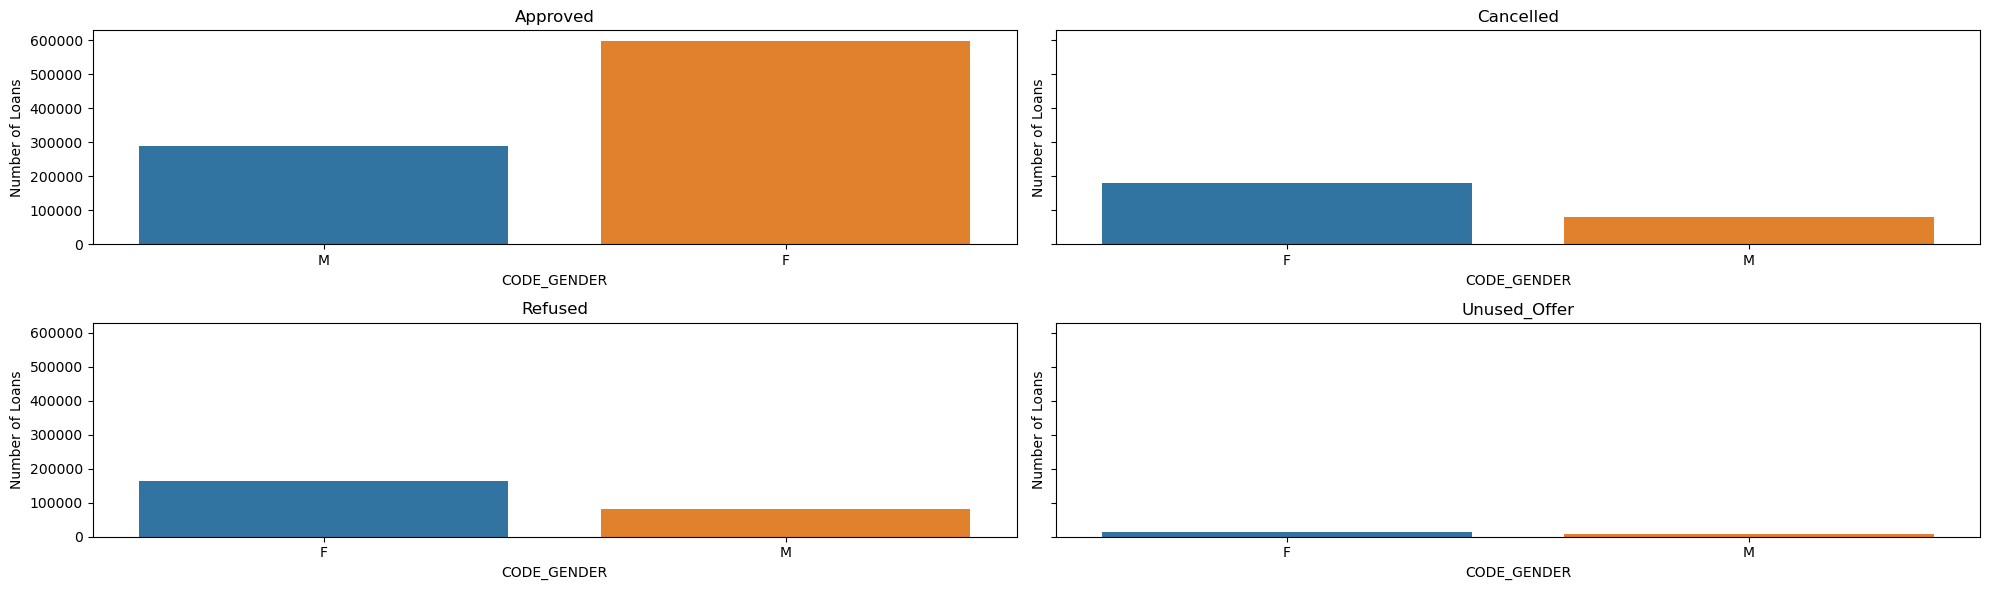

In [107]:
# Analysis on variable 'CODE_GENDER' 

fig,((sb1,sb2),(sb3,sb4)) = plt.subplots(nrows=2,ncols=2,figsize=(20,6), sharey=True)

sb1 = sns.countplot(ax=sb1, data=approved, x="CODE_GENDER")
sb1.set_title("Approved")
sb1.set_xlabel("CODE_GENDER")
sb1.set_ylabel("Number of Loans")

sb2 = sns.countplot(ax=sb2, data=canceled, x="CODE_GENDER")
sb2.set_title("Cancelled")
sb2.set_xlabel("CODE_GENDER")
sb2.set_ylabel("Number of Loans")

sb3 = sns.countplot(ax=sb3, data=refused, x="CODE_GENDER")
sb3.set_title("Refused")
sb3.set_xlabel("CODE_GENDER")
sb3.set_ylabel("Number of Loans")

sb4 = sns.countplot(ax=sb4, data=unused_, x="CODE_GENDER")
sb4.set_title("Unused_Offer")
sb4.set_xlabel("CODE_GENDER")
sb4.set_ylabel("Number of Loans")

plt.tight_layout()
plt.show()

- Here we can see that Female is getting more Approved, Canceled, Refused and more Unused.,
- but in male cases seeing it is having average in every category.

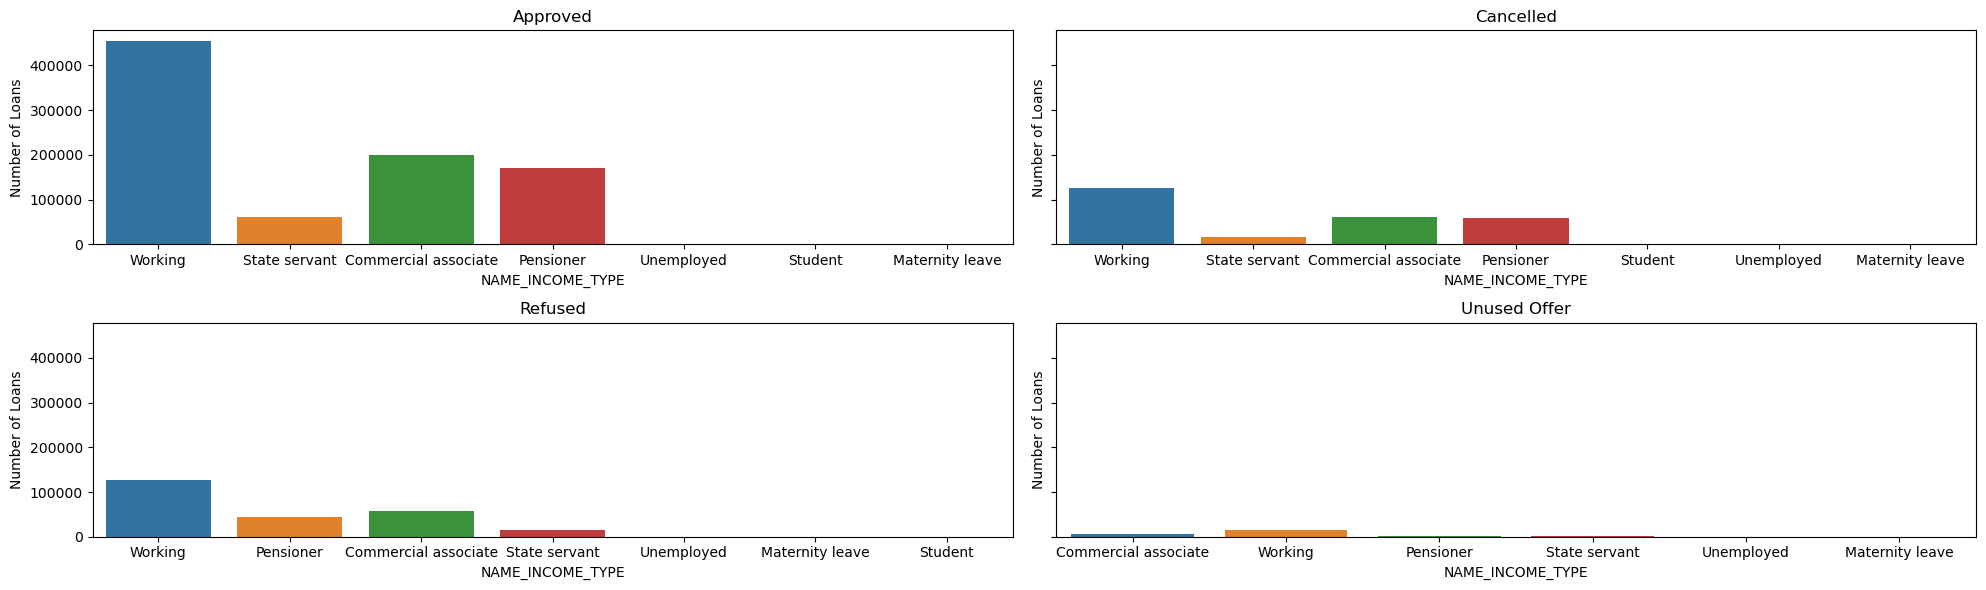

In [108]:
# Analysis on variable 'NAME_INCOME_TYPE'

fig,((sb1,sb2),(sb3,sb4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,6), sharey=True)

sb1 = sns.countplot(ax=sb1, data=approved, x="NAME_INCOME_TYPE")
sb1.set_title("Approved")
sb1.set_xlabel("NAME_INCOME_TYPE")
sb1.set_ylabel("Number of Loans")

sb2 = sns.countplot(ax=sb2, data=canceled, x="NAME_INCOME_TYPE")
sb2.set_title("Cancelled")
sb2.set_xlabel("NAME_INCOME_TYPE")
sb2.set_ylabel("Number of Loans")

sb3 = sns.countplot(ax=sb3, data=refused, x="NAME_INCOME_TYPE")
sb3.set_title("Refused")
sb3.set_xlabel("NAME_INCOME_TYPE")
sb3.set_ylabel("Number of Loans")

sb4 = sns.countplot(ax=sb4, data=unused_, x="NAME_INCOME_TYPE")
sb4.set_title("Unused Offer")
sb4.set_xlabel("NAME_INCOME_TYPE")
sb4.set_ylabel("Number of Loans")

plt.tight_layout()
plt.show()

- Here I am that the working type people are applying more loans as compare to others and Commercial associates people's are taking more loans.

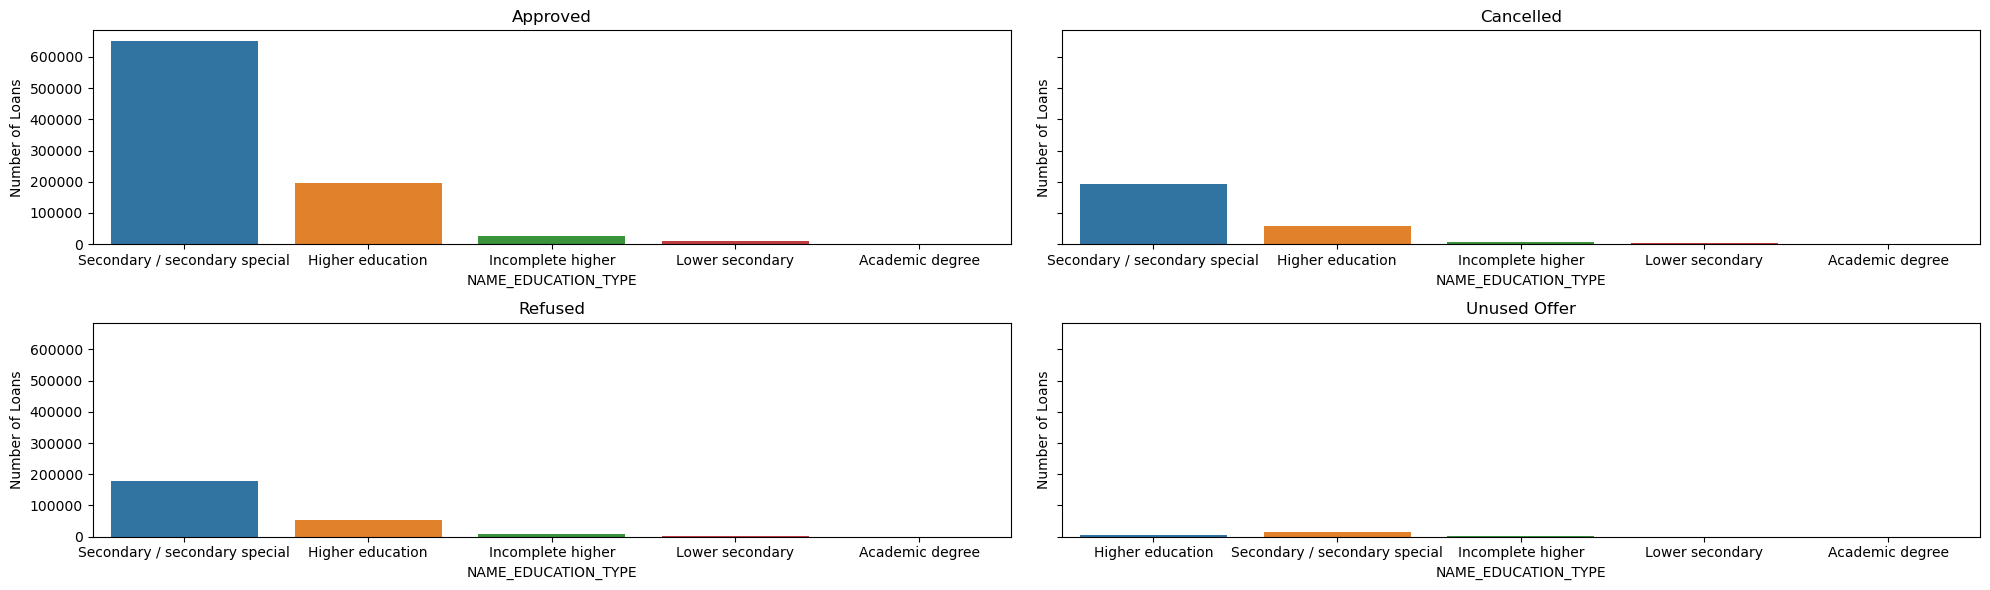

In [109]:
# Analysis on variable 'NAME_EDUCATION_TYPE'

fig,((sb1,sb2),(sb3,sb4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,6), sharey=True)

sb1 = sns.countplot(ax=sb1, data=approved, x="NAME_EDUCATION_TYPE")
sb1.set_title("Approved")
sb1.set_xlabel("NAME_EDUCATION_TYPE")
sb1.set_ylabel("Number of Loans")

sb2 = sns.countplot(ax=sb2, data=canceled, x="NAME_EDUCATION_TYPE")
sb2.set_title("Cancelled")
sb2.set_xlabel("NAME_EDUCATION_TYPE")
sb2.set_ylabel("Number of Loans")

sb3 = sns.countplot(ax=sb3, data=refused, x="NAME_EDUCATION_TYPE")
sb3.set_title("Refused")
sb3.set_xlabel("NAME_EDUCATION_TYPE")
sb3.set_ylabel("Number of Loans")

sb4 = sns.countplot(ax=sb4, data=unused_, x="NAME_EDUCATION_TYPE")
sb4.set_title("Unused Offer")
sb4.set_xlabel("NAME_EDUCATION_TYPE")
sb4.set_ylabel("Number of Loans")

plt.tight_layout()
plt.show()

- Here Secondary/Secondary special is more effective in every cases.

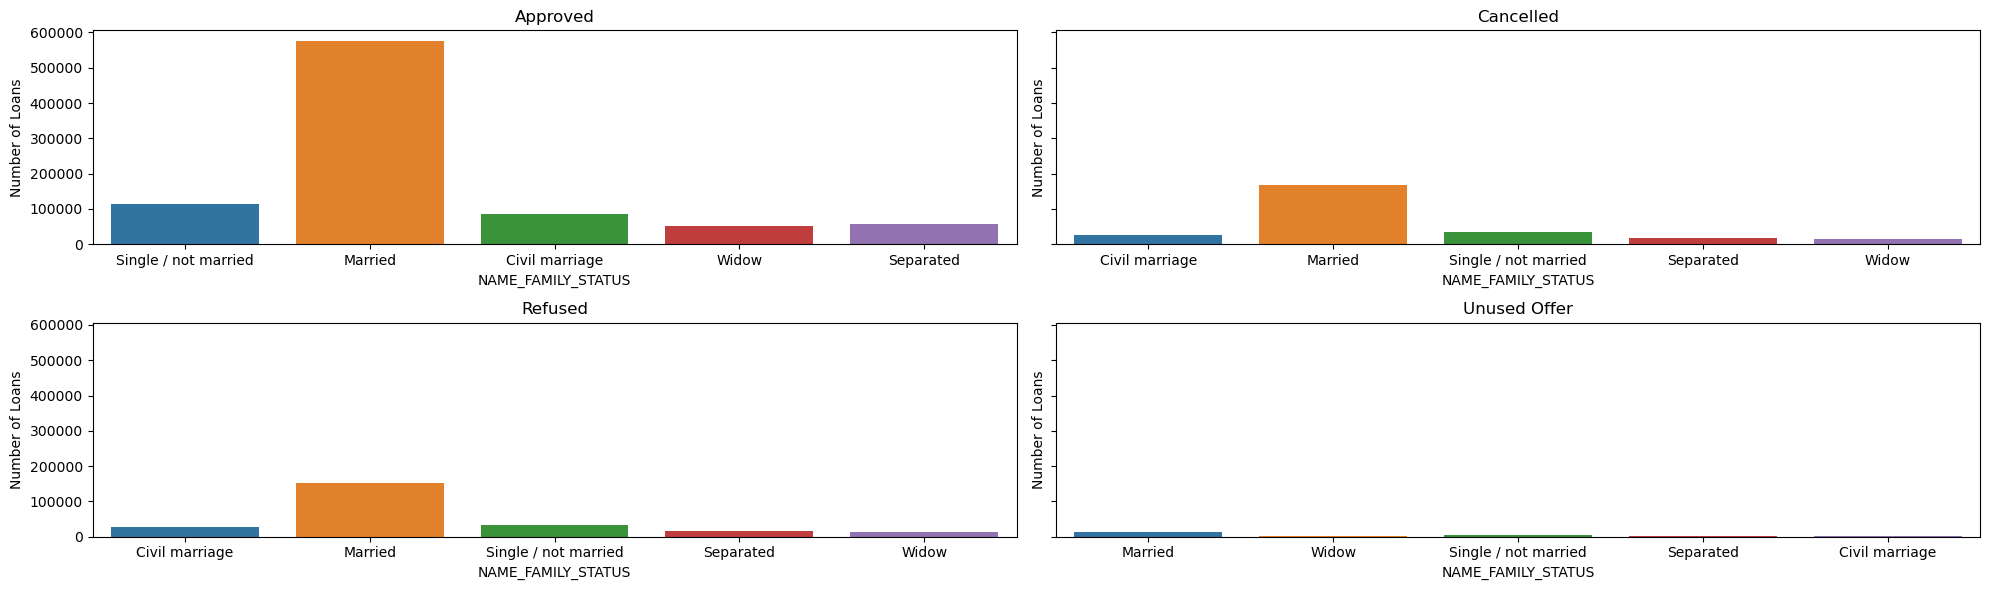

In [110]:
# Analysis on NAME_FAMILY_STATUS

fig,((sb1,sb2),(sb3,sb4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,6), sharey=True)

sb1 = sns.countplot(ax=sb1, data=approved, x="NAME_FAMILY_STATUS")
sb1.set_title("Approved")
sb1.set_xlabel("NAME_FAMILY_STATUS")
sb1.set_ylabel("Number of Loans")

sb2 = sns.countplot(ax=sb2, data=canceled, x="NAME_FAMILY_STATUS")
sb2.set_title("Cancelled")
sb2.set_xlabel("NAME_FAMILY_STATUS")
sb2.set_ylabel("Number of Loans")

sb3 = sns.countplot(ax=sb3, data=refused, x="NAME_FAMILY_STATUS")
sb3.set_title("Refused")
sb3.set_xlabel("NAME_FAMILY_STATUS")
sb3.set_ylabel("Number of Loans")

sb4 = sns.countplot(ax=sb4, data=unused_, x="NAME_FAMILY_STATUS")
sb4.set_title("Unused Offer")
sb4.set_xlabel("NAME_FAMILY_STATUS")
sb4.set_ylabel("Number of Loans")

plt.tight_layout()
plt.show()

- Here I am seeing that the Married people are applying and taking loans more than the others.

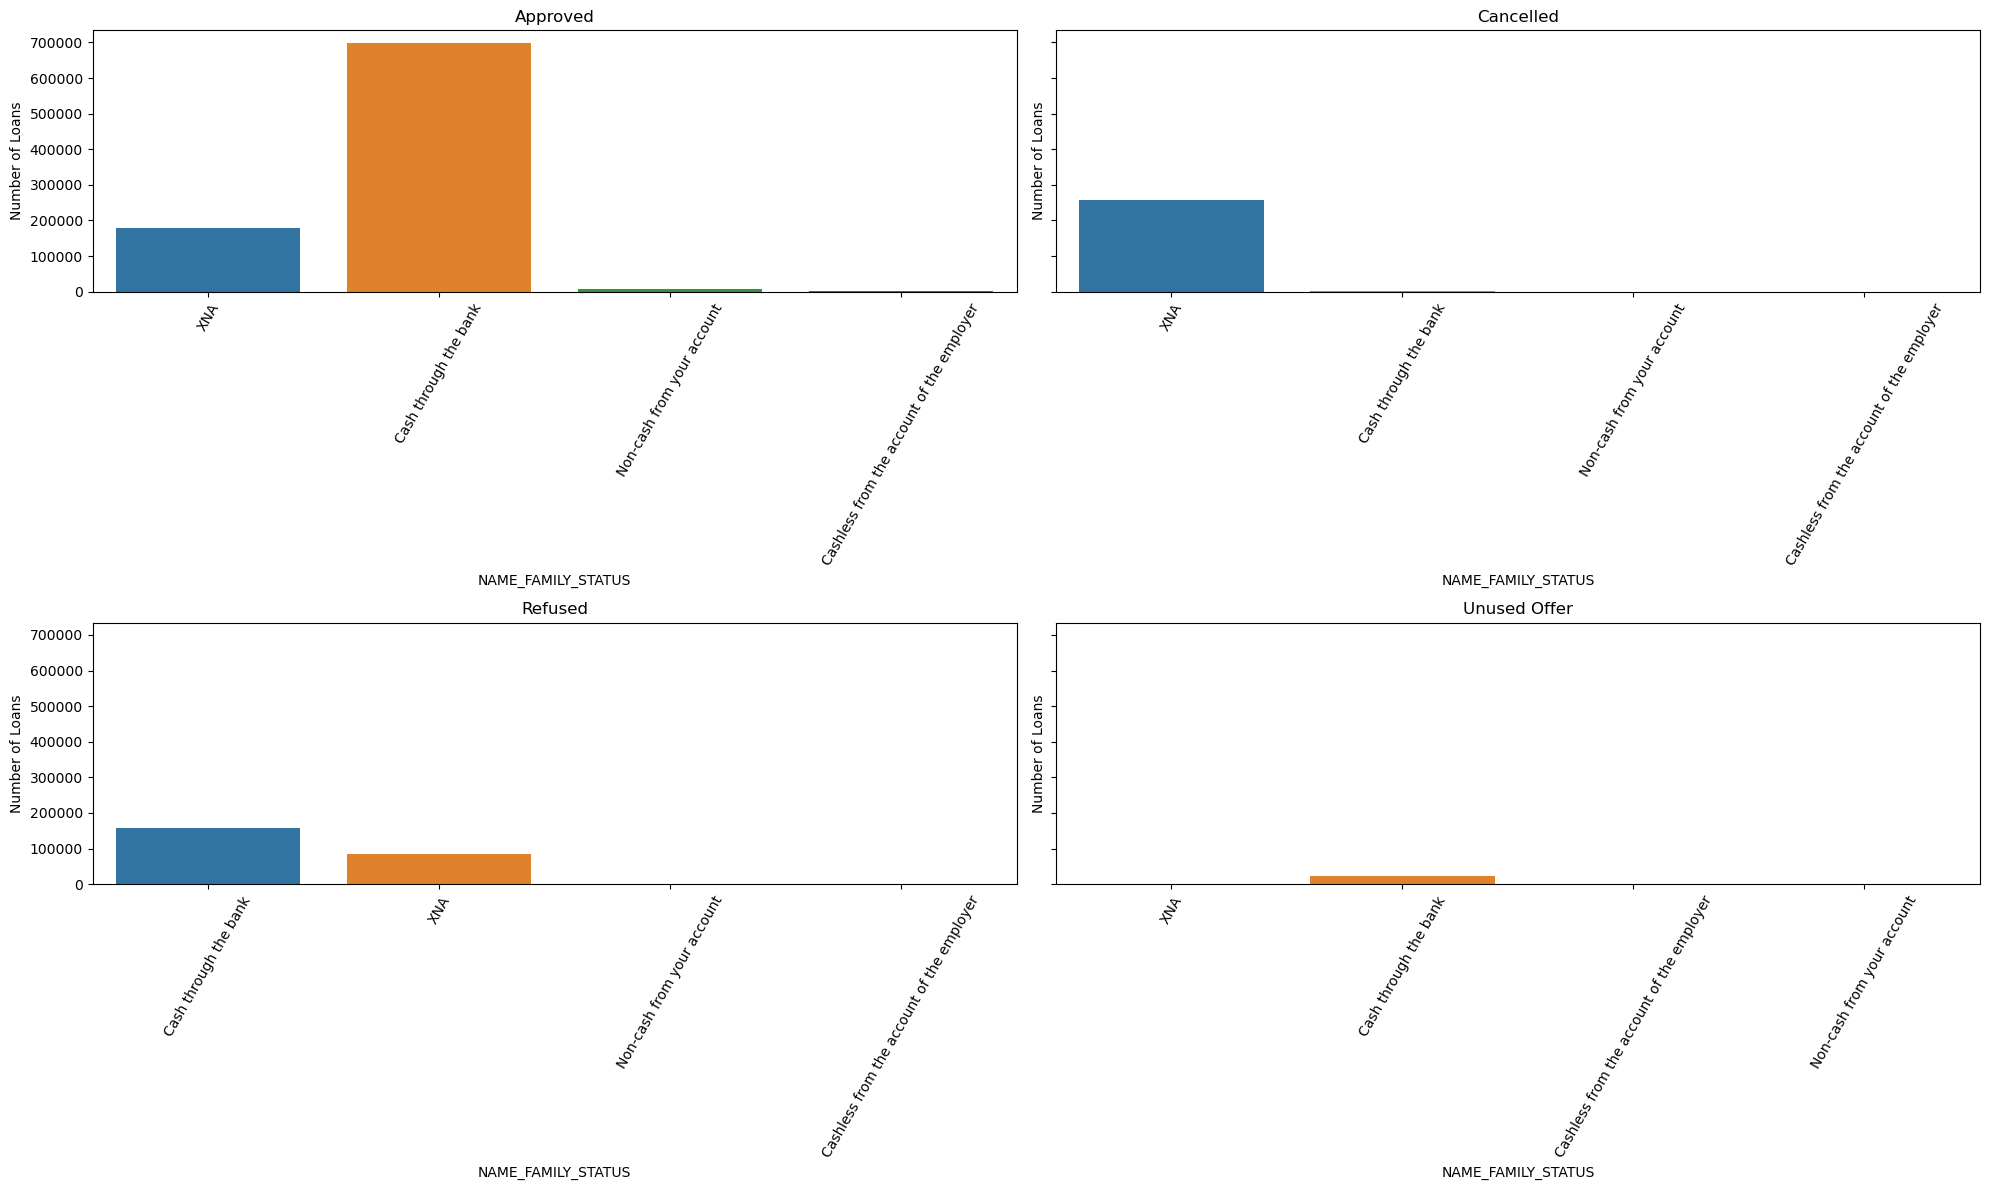

In [111]:
# Analysisn on NAME_PAYMENT_TYPE

fig,((sb1,sb2),(sb3,sb4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,12), sharey=True)

sb1 = sns.countplot(ax=sb1, data=approved, x="NAME_PAYMENT_TYPE")
sb1.set_title("Approved")
sb1.set_xlabel("NAME_FAMILY_STATUS")
sb1.set_ylabel("Number of Loans")
sb1.set_xticklabels(sb1.get_xticklabels(), rotation=60)

sb2 = sns.countplot(ax=sb2, data=canceled, x="NAME_PAYMENT_TYPE")
sb2.set_title("Cancelled")
sb2.set_xlabel("NAME_FAMILY_STATUS")
sb2.set_ylabel("Number of Loans")
sb2.set_xticklabels(sb2.get_xticklabels(), rotation=60)

sb3 = sns.countplot(ax=sb3, data=refused, x="NAME_PAYMENT_TYPE")
sb3.set_title("Refused")
sb3.set_xlabel("NAME_FAMILY_STATUS")
sb3.set_ylabel("Number of Loans")
sb3.set_xticklabels(sb3.get_xticklabels(), rotation=60)

sb4 = sns.countplot(ax=sb4, data=unused_, x="NAME_PAYMENT_TYPE")
sb4.set_title("Unused Offer")
sb4.set_xlabel("NAME_FAMILY_STATUS")
sb4.set_ylabel("Number of Loans")
sb4.set_xticklabels(sb4.get_xticklabels(), rotation=60)

plt.tight_layout()
plt.show()

- Here I am seeing that the people are taking more loans in format of cash through the bank.

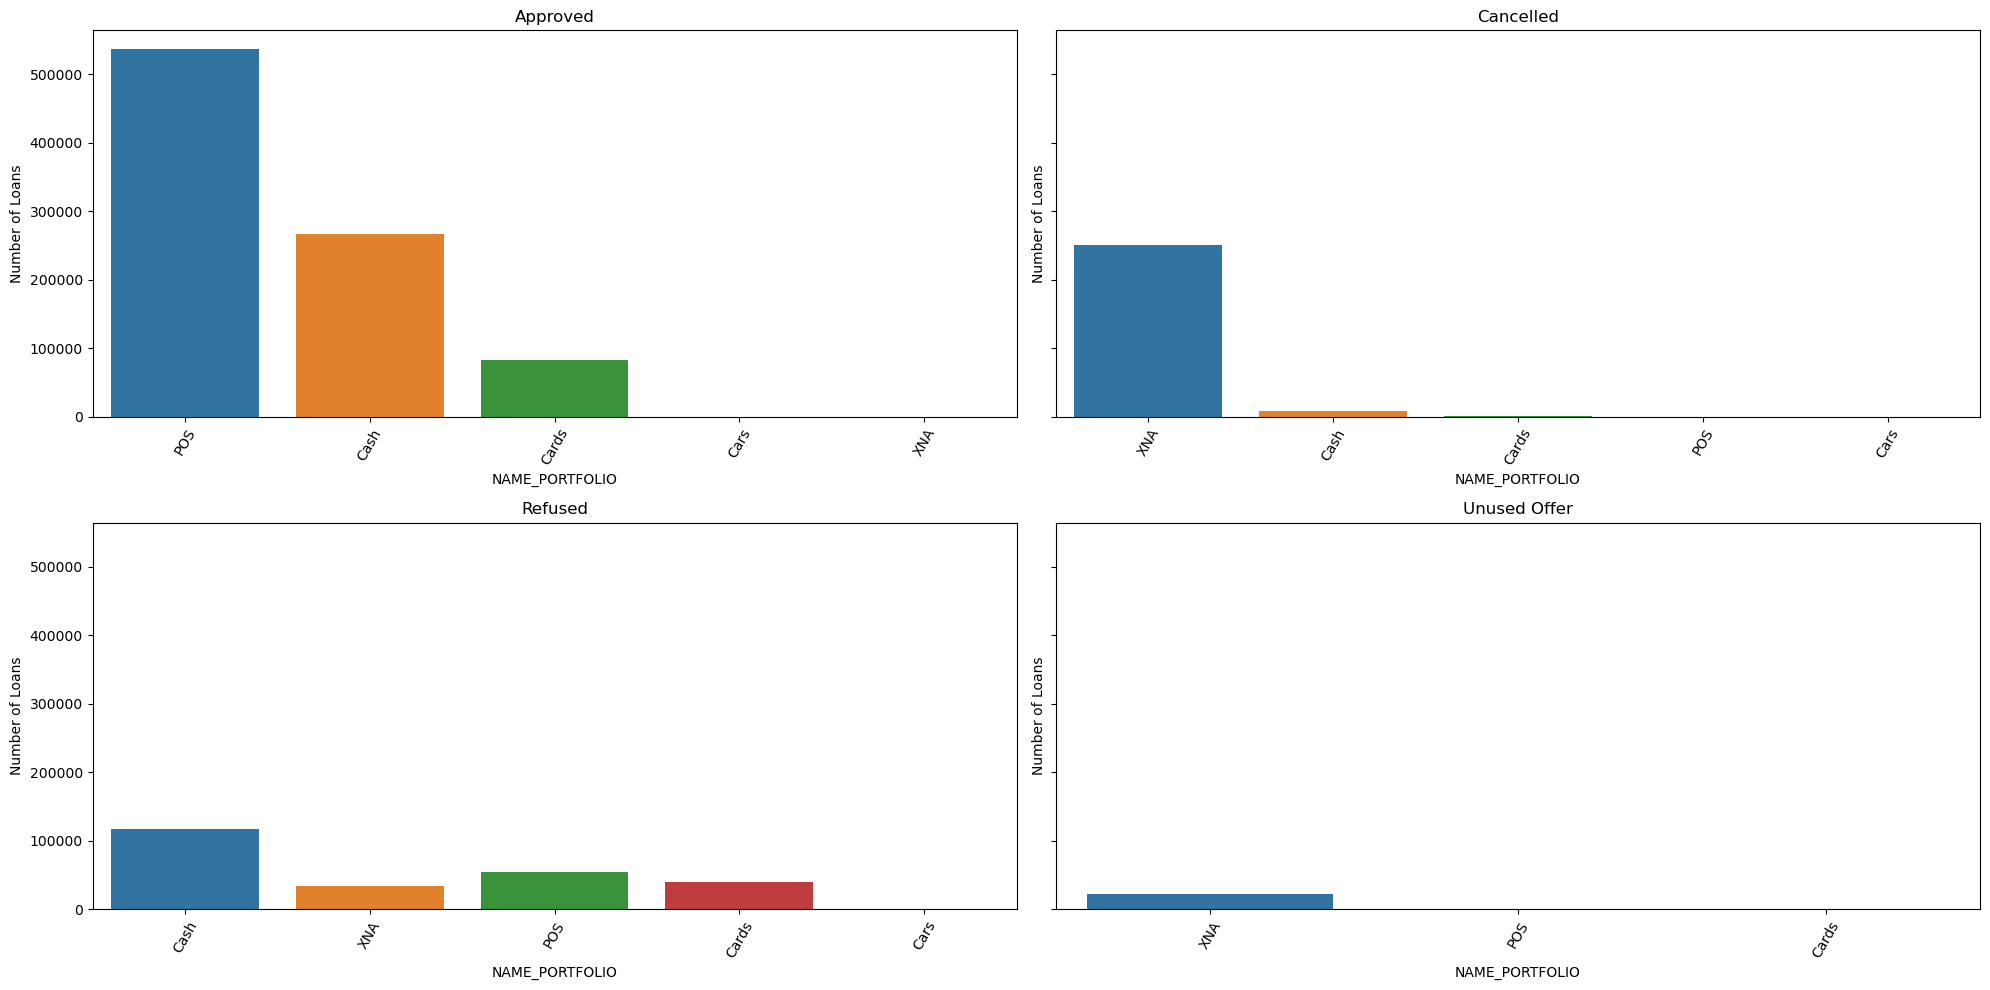

In [112]:
# Analysis on NAME_PORTFOLIO

fig,((sb1,sb2),(sb3,sb4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,10), sharey=True)

sb1 = sns.countplot(ax=sb1, data=approved, x="NAME_PORTFOLIO")
sb1.set_title("Approved")
sb1.set_xlabel("NAME_PORTFOLIO")
sb1.set_ylabel("Number of Loans")
sb1.set_xticklabels(sb1.get_xticklabels(), rotation=60)

sb2 = sns.countplot(ax=sb2, data=canceled, x="NAME_PORTFOLIO")
sb2.set_title("Cancelled")
sb2.set_xlabel("NAME_PORTFOLIO")
sb2.set_ylabel("Number of Loans")
sb2.set_xticklabels(sb2.get_xticklabels(), rotation=60)

sb3 = sns.countplot(ax=sb3, data=refused, x="NAME_PORTFOLIO")
sb3.set_title("Refused")
sb3.set_xlabel("NAME_PORTFOLIO")
sb3.set_ylabel("Number of Loans")
sb3.set_xticklabels(sb3.get_xticklabels(), rotation=60)

sb4 = sns.countplot(ax=sb4, data=unused_, x="NAME_PORTFOLIO")
sb4.set_title("Unused Offer")
sb4.set_xlabel("NAME_PORTFOLIO")
sb4.set_ylabel("Number of Loans")
sb4.set_xticklabels(sb4.get_xticklabels(), rotation=60)

plt.tight_layout()
plt.show()

- Here I am seeing the most approved loan were through Cash and Most refused loans were in POS.

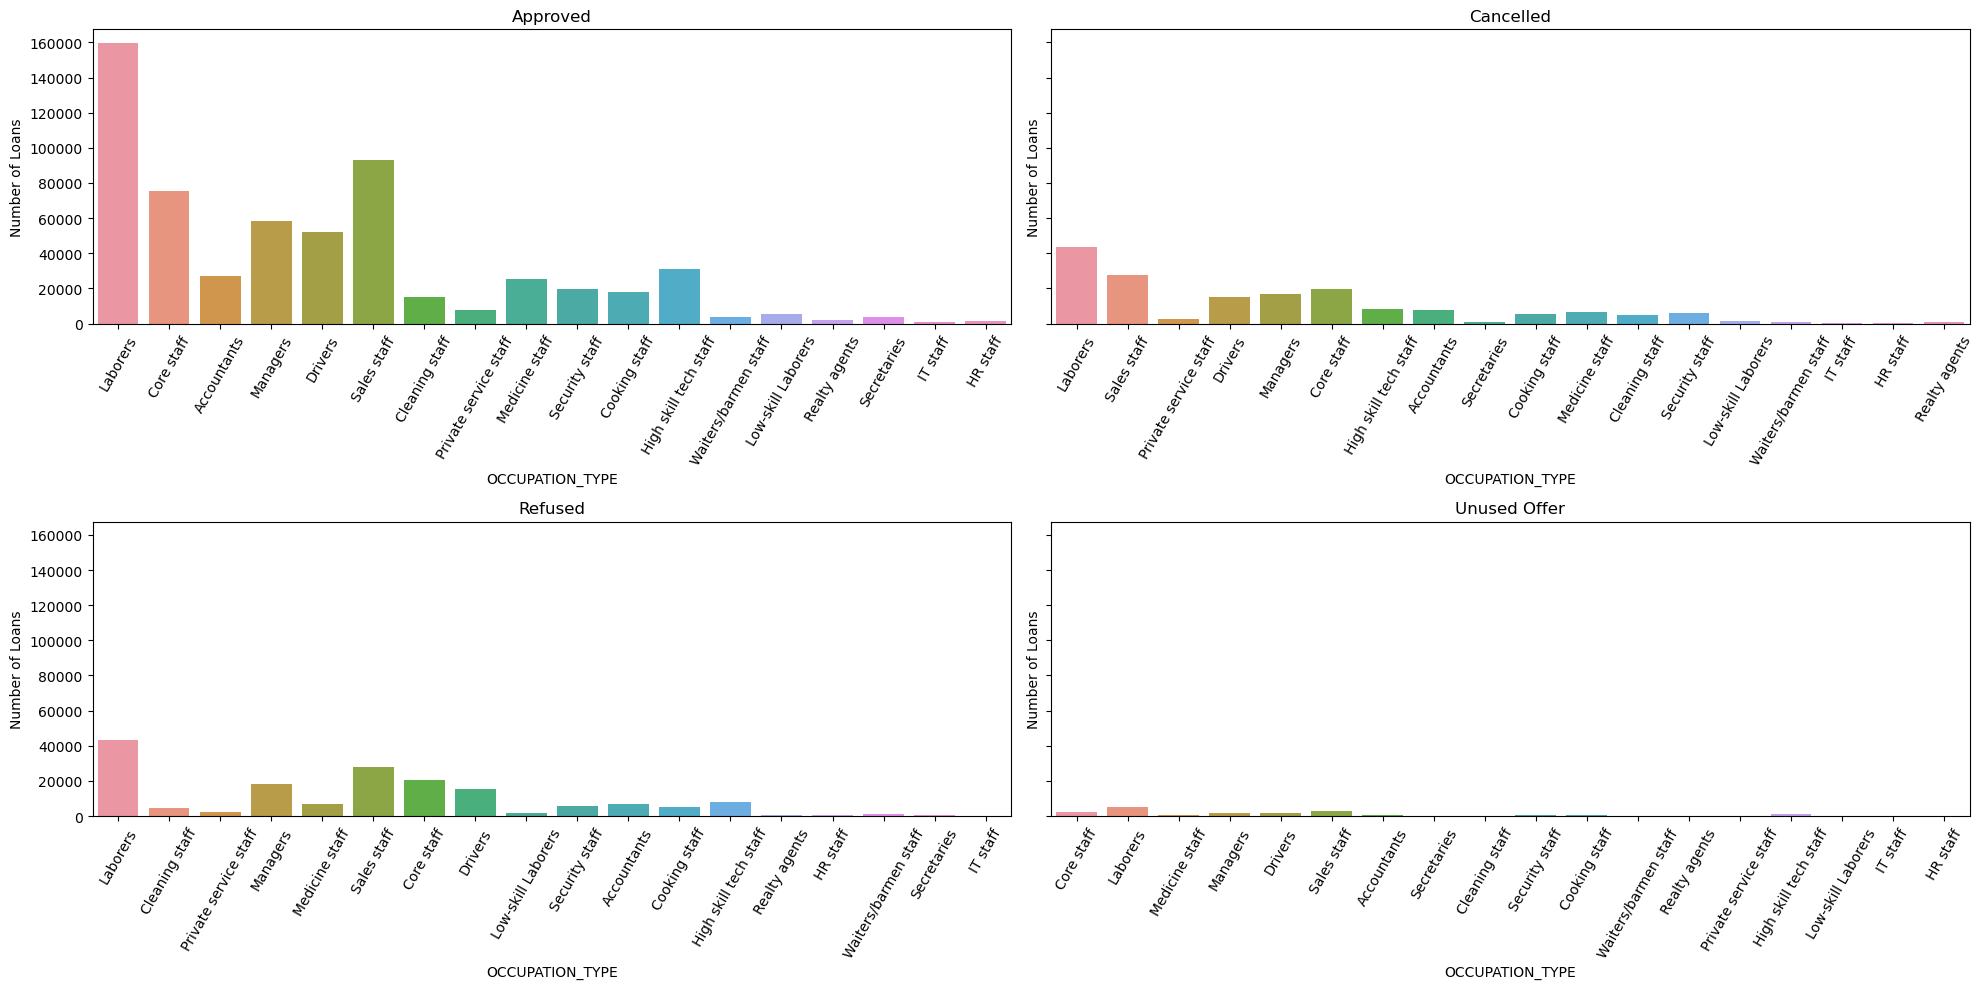

In [113]:
# Analysis on OCCUPATION_TYPE

fig,((sb1,sb2),(sb3,sb4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,10), sharey=True)

sb1 = sns.countplot(ax=sb1, data=approved, x="OCCUPATION_TYPE")
sb1.set_title("Approved")
sb1.set_xlabel("OCCUPATION_TYPE")
sb1.set_ylabel("Number of Loans")
sb1.set_xticklabels(sb1.get_xticklabels(), rotation=60)

sb2 = sns.countplot(ax=sb2, data=canceled, x="OCCUPATION_TYPE")
sb2.set_title("Cancelled")
sb2.set_xlabel("OCCUPATION_TYPE")
sb2.set_ylabel("Number of Loans")
sb2.set_xticklabels(sb2.get_xticklabels(), rotation=60)

sb3 = sns.countplot(ax=sb3, data=refused, x="OCCUPATION_TYPE")
sb3.set_title("Refused")
sb3.set_xlabel("OCCUPATION_TYPE")
sb3.set_ylabel("Number of Loans")
sb3.set_xticklabels(sb3.get_xticklabels(), rotation=60)

sb4 = sns.countplot(ax=sb4, data=unused_, x="OCCUPATION_TYPE")
sb4.set_title("Unused Offer")
sb4.set_xlabel("OCCUPATION_TYPE")
sb4.set_ylabel("Number of Loans")
sb4.set_xticklabels(sb4.get_xticklabels(), rotation=60)

plt.tight_layout()
plt.show()

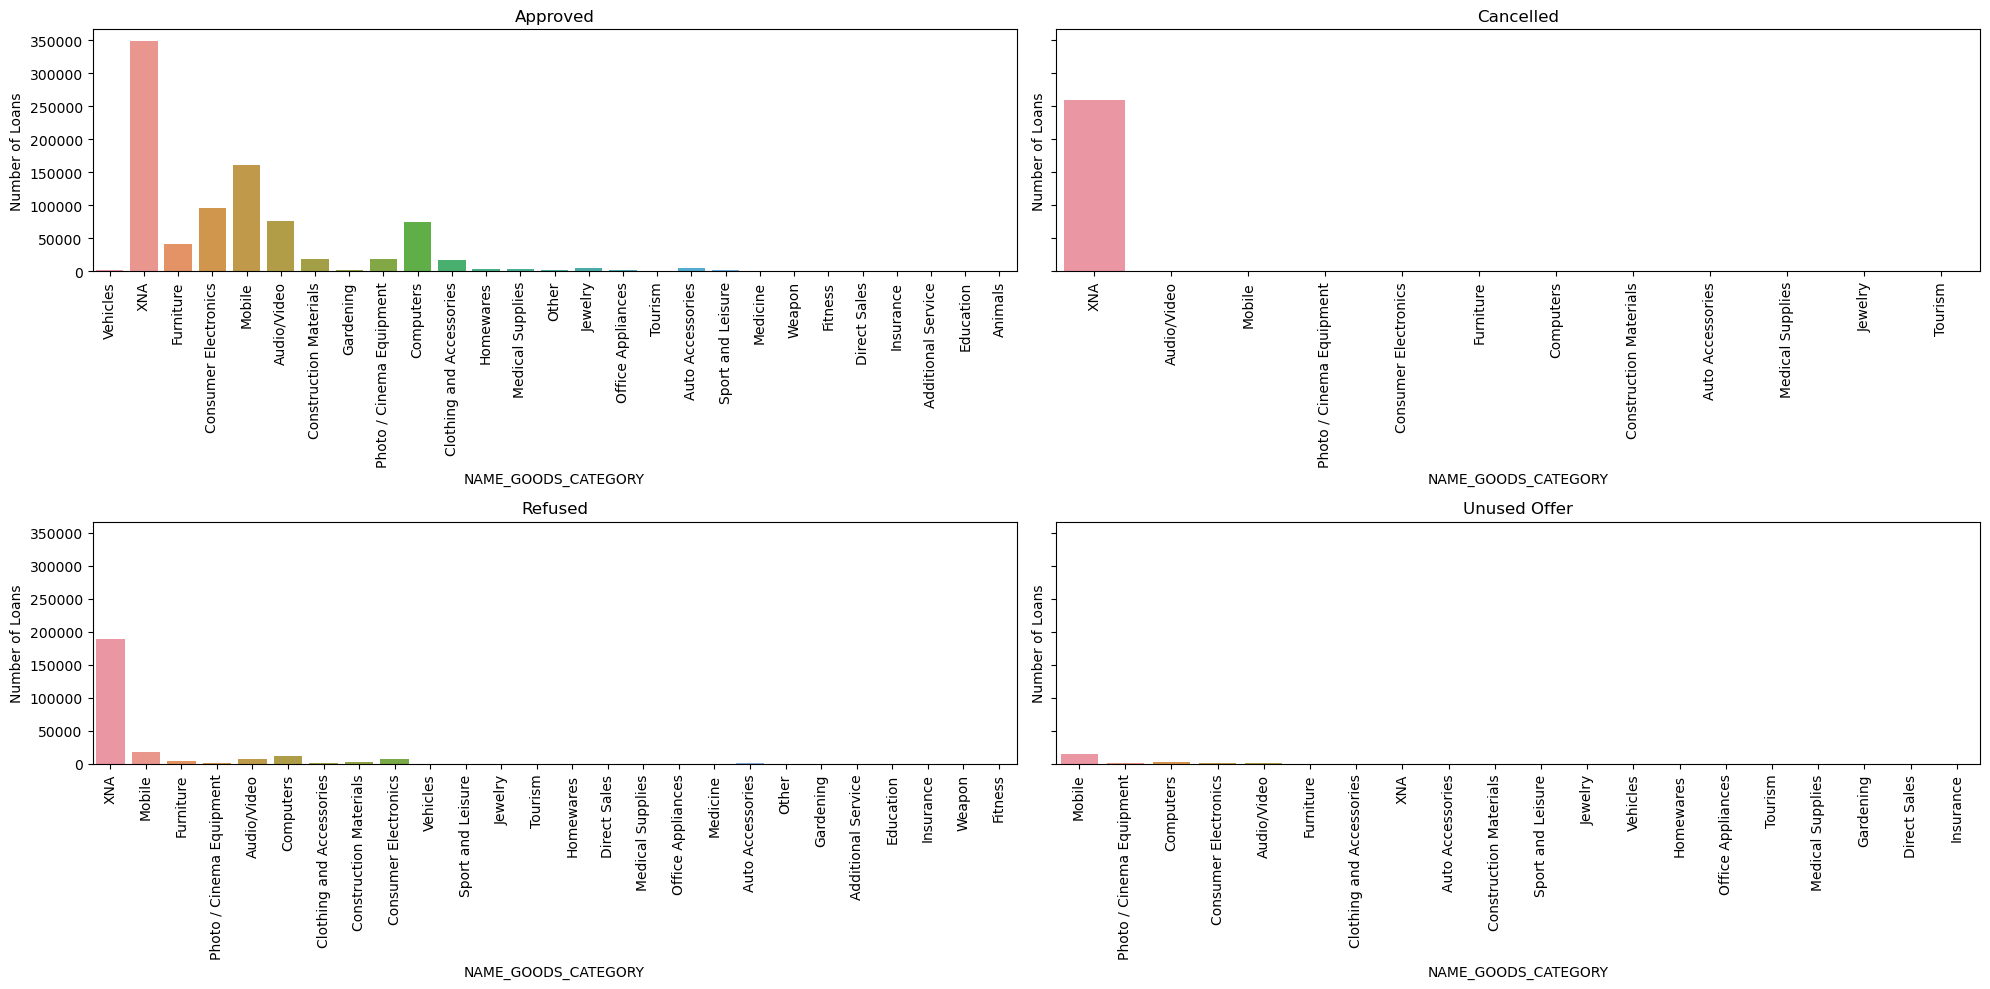

In [114]:
# Analysis on NAME_GOODS_CATEGORY

fig,((sb1,sb2),(sb3,sb4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,10), sharey=True)

sb1 = sns.countplot(ax=sb1, data=approved, x="NAME_GOODS_CATEGORY")
sb1.set_title("Approved")
sb1.set_xlabel("NAME_GOODS_CATEGORY")
sb1.set_ylabel("Number of Loans")
sb1.set_xticklabels(sb1.get_xticklabels(), rotation=90)

sb2 = sns.countplot(ax=sb2, data=canceled, x="NAME_GOODS_CATEGORY")
sb2.set_title("Cancelled")
sb2.set_xlabel("NAME_GOODS_CATEGORY")
sb2.set_ylabel("Number of Loans")
sb2.set_xticklabels(sb2.get_xticklabels(), rotation=90)

sb3 = sns.countplot(ax=sb3, data=refused, x="NAME_GOODS_CATEGORY")
sb3.set_title("Refused")
sb3.set_xlabel("NAME_GOODS_CATEGORY")
sb3.set_ylabel("Number of Loans")
sb3.set_xticklabels(sb3.get_xticklabels(), rotation=90)

sb4 = sns.countplot(ax=sb4, data=unused_, x="NAME_GOODS_CATEGORY")
sb4.set_title("Unused Offer")
sb4.set_xlabel("NAME_GOODS_CATEGORY")
sb4.set_ylabel("Number of Loans")
sb4.set_xticklabels(sb4.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

- Here I am seeing the most Refused loan is of Mobile and most approved loan is Mobile.

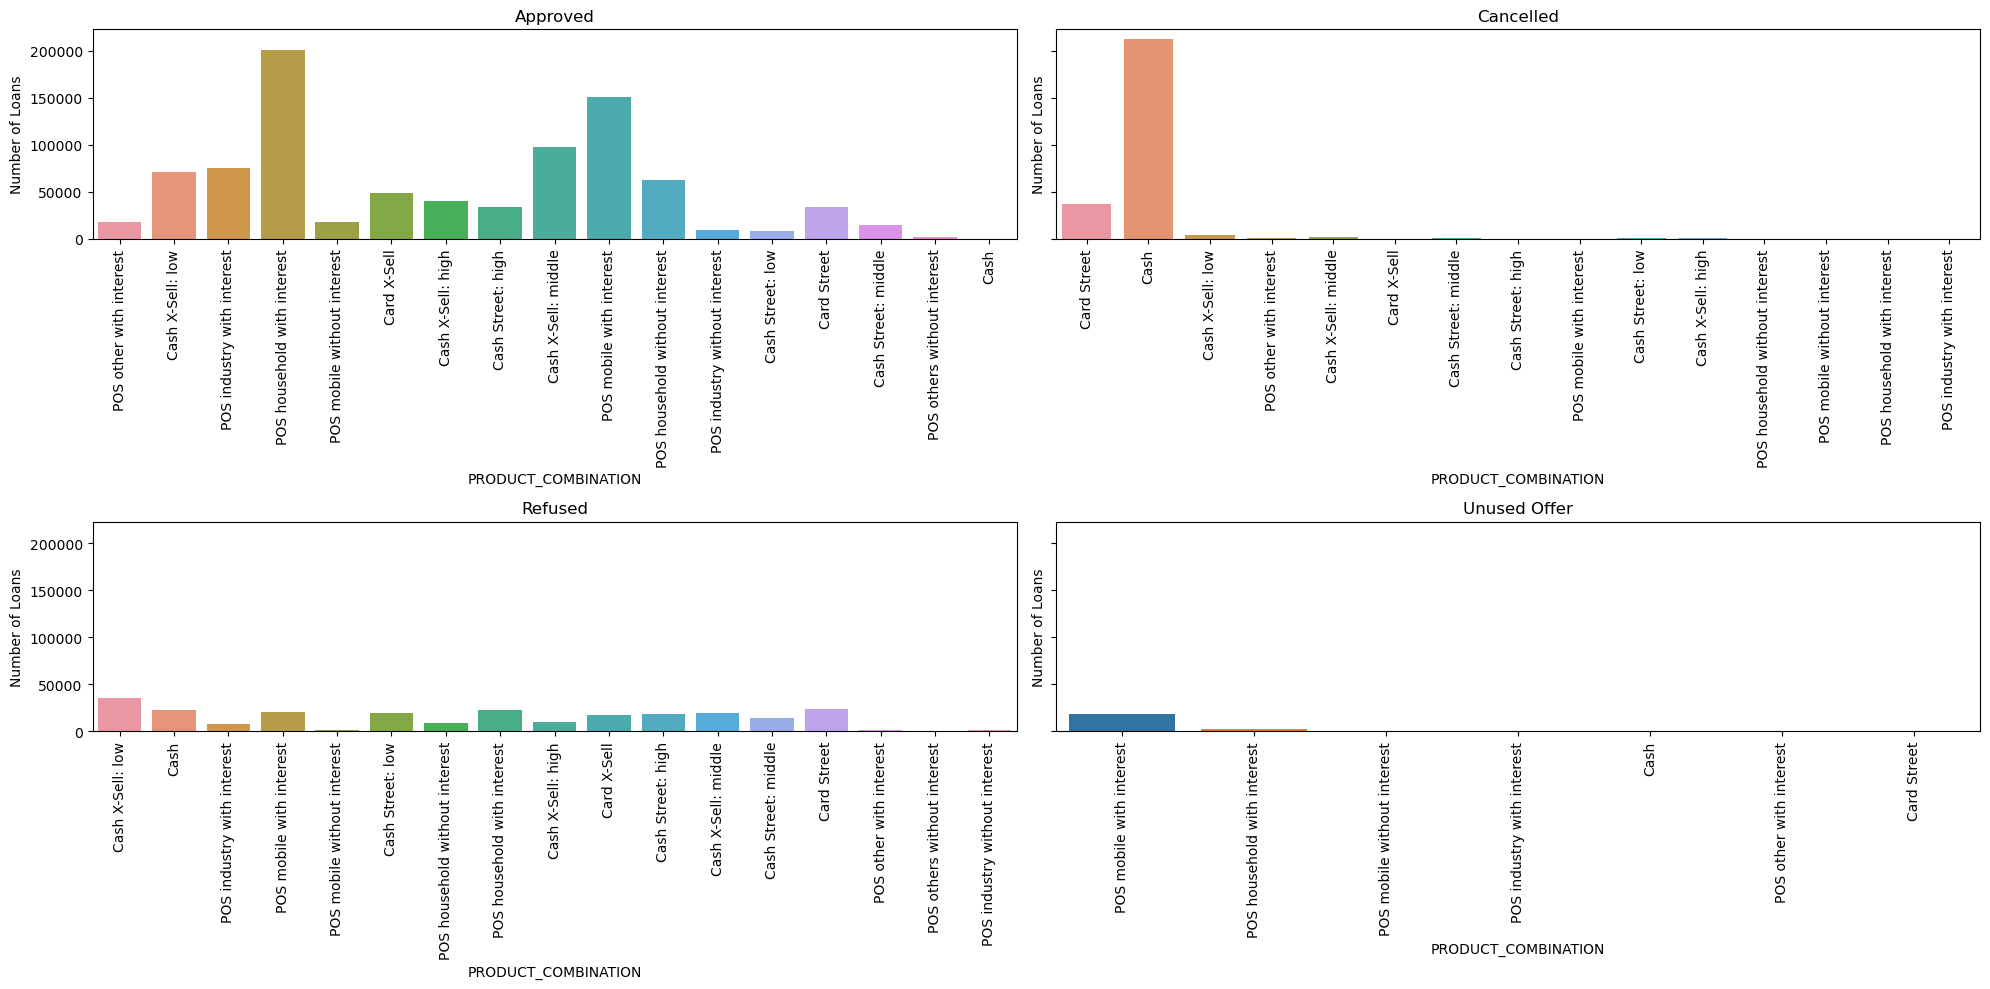

In [115]:
# Analysis on PRODUCT_COMBINATION

fig,((sb1,sb2),(sb3,sb4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,10), sharey=True)

sb1 = sns.countplot(ax=sb1, data=approved, x="PRODUCT_COMBINATION")
sb1.set_title("Approved")
sb1.set_xlabel("PRODUCT_COMBINATION")
sb1.set_ylabel("Number of Loans")
sb1.set_xticklabels(sb1.get_xticklabels(), rotation=90)

sb2 = sns.countplot(ax=sb2, data=canceled, x="PRODUCT_COMBINATION")
sb2.set_title("Cancelled")
sb2.set_xlabel("PRODUCT_COMBINATION")
sb2.set_ylabel("Number of Loans")
sb2.set_xticklabels(sb2.get_xticklabels(), rotation=90)

sb3 = sns.countplot(ax=sb3, data=refused, x="PRODUCT_COMBINATION")
sb3.set_title("Refused")
sb3.set_xlabel("PRODUCT_COMBINATION")
sb3.set_ylabel("Number of Loans")
sb3.set_xticklabels(sb3.get_xticklabels(), rotation=90)

sb4 = sns.countplot(ax=sb4, data=unused_, x="PRODUCT_COMBINATION")
sb4.set_title("Unused Offer")
sb4.set_xlabel("PRODUCT_COMBINATION")
sb4.set_ylabel("Number of Loans")
sb4.set_xticklabels(sb4.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

- The most accepting loan is Cash X-sell:low And most canceled loan is Cash and Most Unused lo